<a href="https://colab.research.google.com/github/muratgguzel/AIML-DeepNN_Project7-BankChurnPrediction/blob/main/Murat_Goksenin_Guzel_Project7_v2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))



Thu Jun 15 22:09:35 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')
! pwd

You are using a high-RAM runtime!
/content


In [281]:
%%shell
jupyter nbconvert --to html ///content/Murat_Goksenin_Guzel_Project7_v2_1.ipynb

[NbConvertApp] Converting notebook ///content/Murat_Goksenin_Guzel_Project7_v2_1.ipynb to html
[NbConvertApp] Writing 5114714 bytes to /content/Murat_Goksenin_Guzel_Project7_v2_1.html


# Bank Churn Prediction Problem Statement


### Background and Context

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider.

It is important to understand which aspects of the service influence a customer's decision in this regard.

Management can concentrate efforts on the improvement of service, keeping in mind these priorities.







### Objective

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

### Data Dictionary
`CustomerId`: Unique ID which is assigned to each customer

`Surname`: Last name of the customer

`CreditScore`: It defines the credit history of the customer.

`Geography`: A customer’s location

`Gender`: It defines the Gender of the customer

`Age`: Age of the customer

`Tenure`: Number of years for which the customer has been with the bank

`NumOfProducts`: It refers to the number of products that a customer has
purchased through the bank.

`Balance`: Account balance

`HasCrCard`: It is a categorical variable that decides whether the customer has a credit card or not.

`EstimatedSalary`: Estimated salary

`isActiveMember`: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )

`Exited`: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values

                    0=No ( Customer did not leave the bank )

                    1=Yes ( Customer left the bank )


## 1-LOADING LIBRARIES

In [5]:
!pip install nb_black

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [279]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [247]:
## Install Keras Tuner
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 13.5 MB/s eta 0:00:00


In [248]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)
warnings.filterwarnings("ignore")

import keras
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

# Library to split data
from sklearn.model_selection import train_test_split
# Library to encode the variables
from sklearn import preprocessing
# To plot confusion matrix
from sklearn.metrics import confusion_matrix
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
#To import different metrics
from sklearn import metrics
import sklearn
from tensorflow.keras import backend
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")
# importing different functions to build models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

##2-LOADING AND EXPLORING DATA

- Loading Data Form CSV

In [8]:
Row_Data = pd.read_csv("https://raw.githubusercontent.com/muratgguzel/AIML-DeepNN_Project7-BankChurnPrediction/main/Churn.csv")

- Copying row data for working

In [9]:
# copying data to another variable to avoid any changes to original data
data = Row_Data.copy()

 View the first and last 5 rows of the dataset.

In [10]:
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

- Understand the shape of the dataset.

In [11]:
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 10000 rows and 14 columns.


The dataset has 10000 rows and 14 columns

 - Check data format

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Data set consist of integer values

Check any null data exits

In [13]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
num_missing = data.isnull().sum(axis=1)
num_missing.value_counts()

0    10000
dtype: int64

In [15]:
round(data.isnull().sum() / data.isnull().count() * 100, 2)

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

No missing data exits in data set

Check for Dublicated Data

In [16]:
data[data.duplicated()].count()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No duplicated data exits

In [17]:
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

**2.1** **Observations About Data**

In [18]:
data.describe(include="all").T

count unique     top  freq           mean           std  \
RowNumber        10000.0    NaN     NaN   NaN         5000.5    2886.89568   
CustomerId       10000.0    NaN     NaN   NaN  15690940.5694  71936.186123   
Surname            10000   2932   Smith    32            NaN           NaN   
CreditScore      10000.0    NaN     NaN   NaN       650.5288     96.653299   
Geography          10000      3  France  5014            NaN           NaN   
Gender             10000      2    Male  5457            NaN           NaN   
Age              10000.0    NaN     NaN   NaN        38.9218     10.487806   
Tenure           10000.0    NaN     NaN   NaN         5.0128      2.892174   
Balance          10000.0    NaN     NaN   NaN   76485.889288  62397.405202   
NumOfProducts    10000.0    NaN     NaN   NaN         1.5302      0.581654   
HasCrCard        10000.0    NaN     NaN   NaN         0.7055       0.45584   
IsActiveMember   10000.0    NaN     NaN   NaN         0.5151      0.499797   
EstimatedSalary  10000.0    NaN     NaN   NaN  100090.239881  57510.492818   
Exited           10000.0    NaN     NaN   NaN         0.2037      0.402769   

                        min          25%         50%          75%         max  
RowNumber               1.0      2500.75      5000.5      7500.25     10000.0  
CustomerId       15565701.0  15628528.25  15690738.0  15753233.75  15815690.0  
Surname                 NaN          NaN         NaN          NaN         NaN  
CreditScore           350.0        584.0       652.0        718.0       850.0  
Geography               NaN          NaN         NaN          NaN         NaN  
Gender                  NaN          NaN         NaN          NaN         NaN  
Age                    18.0         32.0        37.0         44.0        92.0  
Tenure                  0.0          3.0         5.0          7.0        10.0  
Balance                 0.0          0.0    97198.54    127644.24   250898.09  
NumOfProducts           1.0          1.0         1.0          2.0         4.0  
HasCrCard               0.0          0.0         1.0          1.0         1.0  
IsActiveMember          0.0          0.0         1.0          1.0         1.0  
EstimatedSalary       11.58     51002.11  100193.915  149388.2475   199992.48  
Exited                  0.0          0.0         0.0          0.0         1.0

The dataset has `10000` rows and `14` columns exits

No missing data exits on data set

No duplicated data exits on data set





**2.2** **Statistical Observations**

`CreditScore`: %50 percent or less having credit score of 652

`Age`: %75 of customers younger than 44 and %50 are younger than 32

`Tenure`: %50 or less has 5 years tenure

`Balance`: %50 of customers have less than 97198 balance at bank and %25 has no balance on bank

`NumOfProducts`: %50 percent or less having 1 product

`HasCrCard`: It is a categorical variable that decides whether the customer has a credit card or not.

`EstimatedSalary`: Maximum Salary is nearly 200000 and %50 having 100193 or less

In [19]:
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

Print data values generalization behaviour

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


##3-EXPLOTARY DATA ANALYSIS

Define Categorical Columns vrs Numerical Columns for EDA Analyzes

In [21]:
numerical_cols = [
    "Geography",
    "Gender",
    "HasCrCard",
    "IsActiveMember",
    "Exited",
    ]

- For EDA analyzes data_EDA dataframe is forming

In [22]:
data_EDA=data.copy()

**3.1** **UNIVARITY ANALYZES**

In [23]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data:    dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**3.1.1** **CHECKING Credit Score**

In [24]:
data_EDA.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

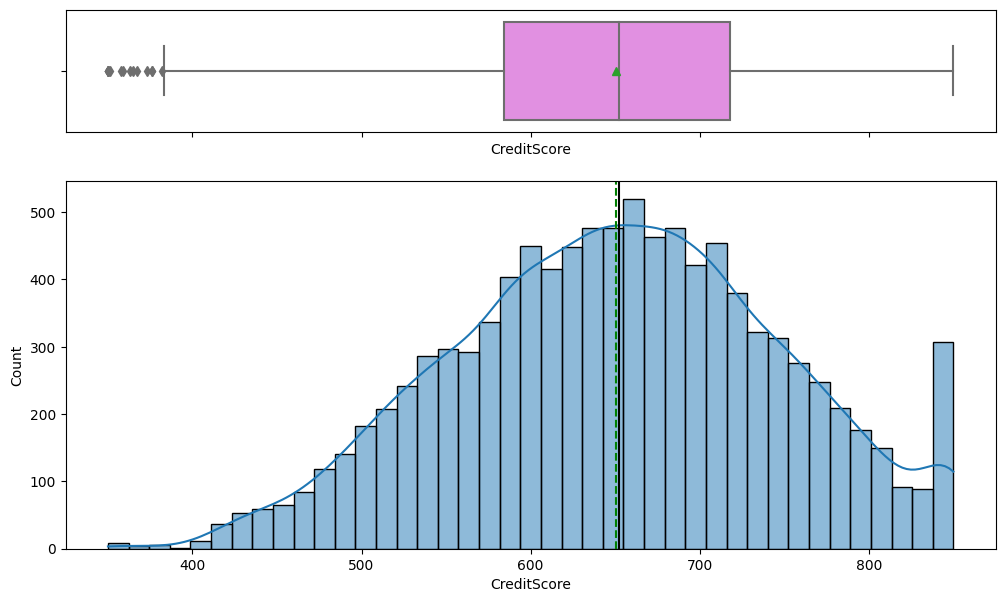

In [25]:
histogram_boxplot(data_EDA,"CreditScore",kde=True)

In [26]:
data_EDA["CreditScore"].median()


652.0

In [27]:
data_EDA["CreditScore"].mean()

650.5288

- Credit scored is left skewed and has outliers with having Mean: 650.5288 and Median: 652

**3.1.2** **CHECKING Balance**

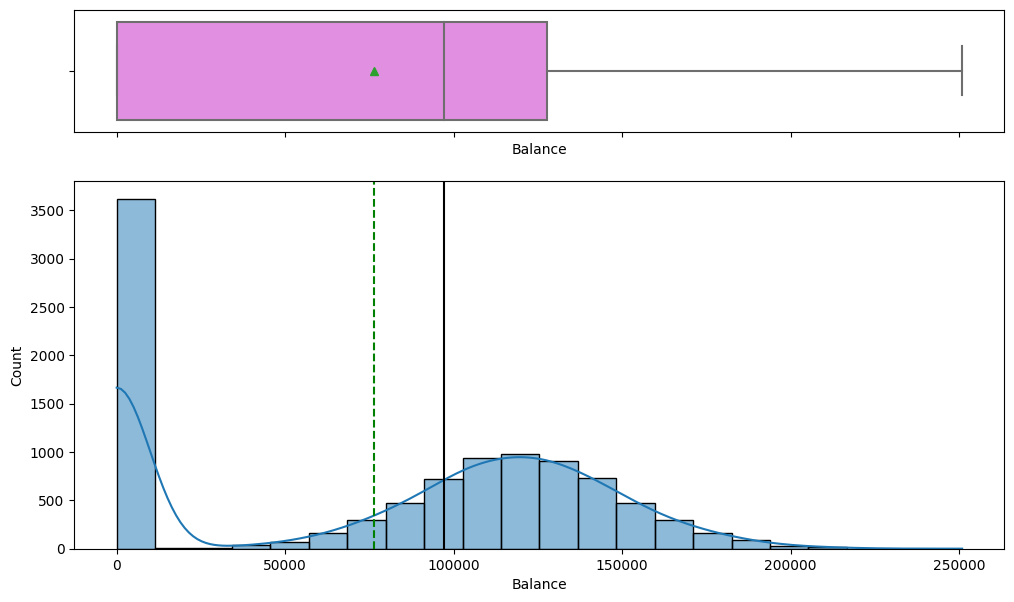

In [28]:
histogram_boxplot(data_EDA,"Balance",kde=True)

Balance shows right skeded distribution having mean=76485 and median=97198




In [29]:
data_EDA["Balance"].mean()

76485.889288

In [30]:
data_EDA["Balance"].median()

97198.54000000001

**3.1.3** **CHECKING Tenure**

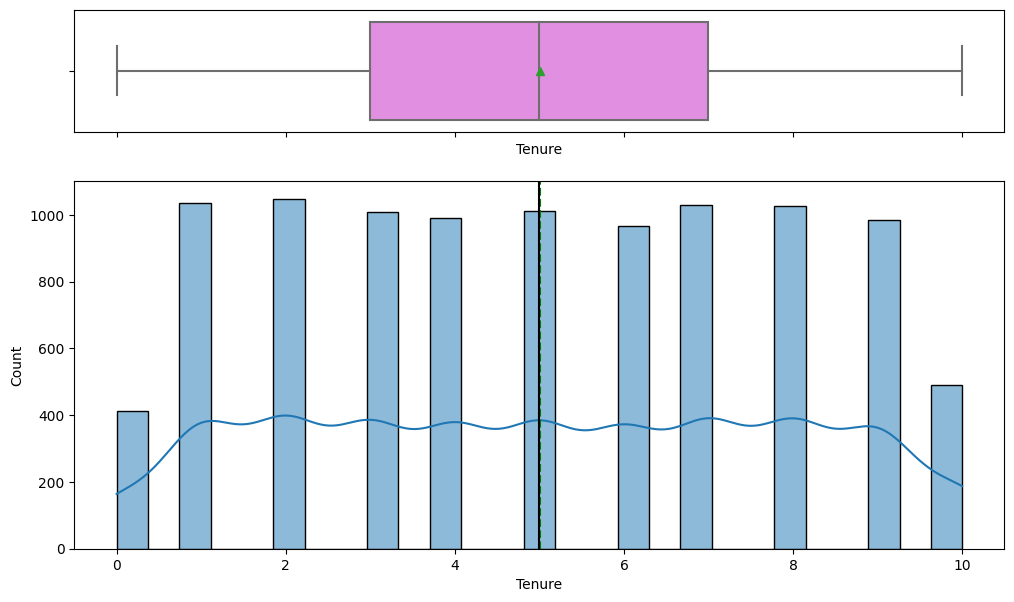

In [31]:
histogram_boxplot(data_EDA,"Tenure",kde=True)

Tenure mean and median is nearly same and having value of 5

In [32]:
data_EDA["Tenure"].mean()

5.0128

In [33]:
data_EDA["Tenure"].median()

5.0

**3.1.4** **CHECKING Estimated Salary**

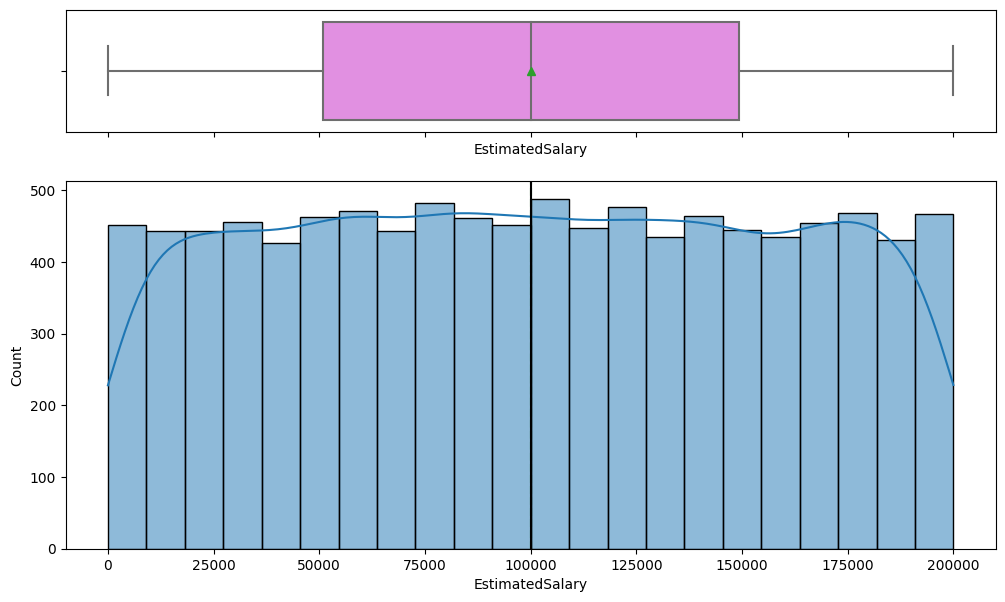

In [34]:
histogram_boxplot(data_EDA,"EstimatedSalary",kde=True)

In [35]:
data_EDA["EstimatedSalary"].mean()

100090.239881

In [36]:
data_EDA["EstimatedSalary"].median()

100193.915

Mean and Median of estimated salary is close to each other and having no outliers.

**3.1.5** **CHECKING Number of Products**

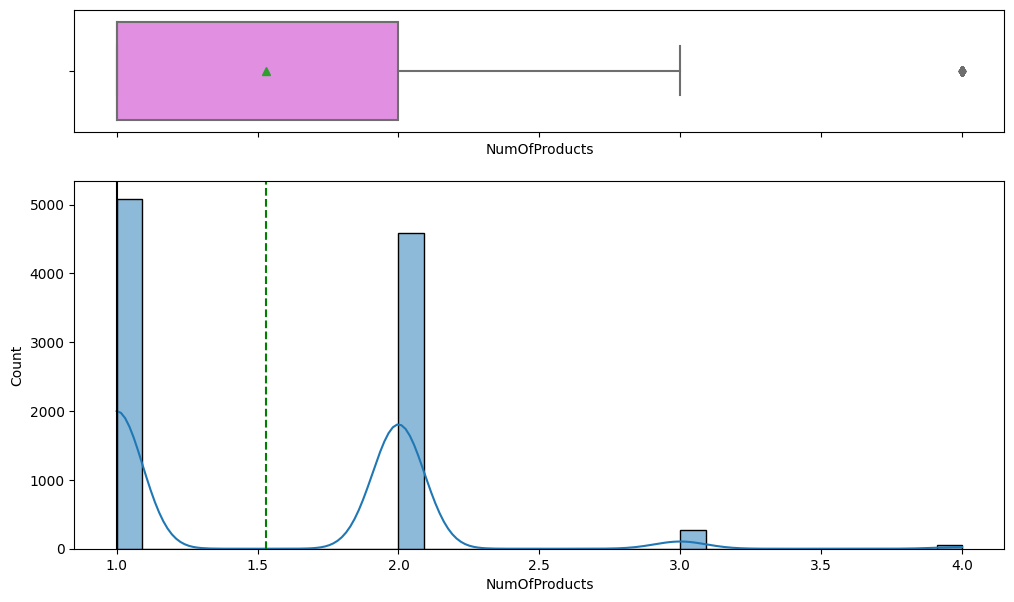

In [37]:
histogram_boxplot(data_EDA,"NumOfProducts",kde=True)

Having outliers , having mean=1.5 and median=1

In [38]:
data_EDA["NumOfProducts"].mean()

1.5302

In [39]:
data_EDA["NumOfProducts"].median()

1.0

In [40]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**3.2** **BIVARIATE ANALYSIS**

In [41]:
data_EDA.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

Dropping Customer ID as no need for EDA analyzes

In [42]:
data_EDA = data_EDA.drop(["RowNumber"], axis=1)

In [43]:
data_EDA = data_EDA.drop(["Surname"], axis=1)

In [44]:
data_EDA = data_EDA.drop(["CustomerId"], axis=1)

In [45]:
data_EDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


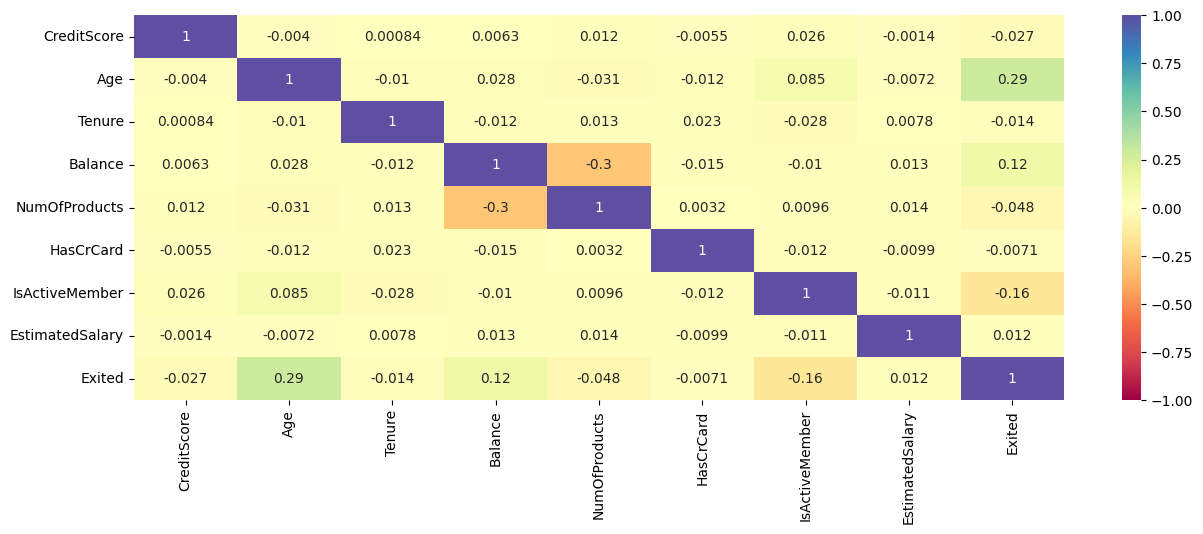

In [46]:
plt.figure(figsize=(15,5))
sns.heatmap(data_EDA.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

**OBSERVATIONS**



*`Exited` has a `POSITIVE` Correlation with `Age` , older people thinks to leave more tha younger people.

*`Exited` has a `POSITIVE` Correlation with `Balance`,this means that customers having increased balance exited more.

*`Exited` has a `NEGATIVE` Correlation with `IsActiveMember`,this means that customers who uses bank product more regulary has some loyalty to bank.

*`Exited` has a `NEGATIVE` Correlation with `Tenure`,this means that customer enggament year negatively impacating Exited ratio

*`Credit Score` has a `POSITIVE` Correlation with `Balance`,this means that people whose balance is high probably may have higher credit score

*`Credit Score` has a `POSITIVE` Correlation with `IsActiveMember`,this means that customers who has good score are generally stable customers

*`NumOfProducts` has a `POSITIVE` Correlation with `Tenure`,this means that customers gaining more products when they engage more years with bank

*`NumOfProducts` has a `POSITIVE` Correlation with `Estimated Salary`,this means that when salary increases customers may prefer to get more products















**Differentiating Numerical Columns**

In [47]:
data_EDA["IsActiveMember"]=data_EDA["IsActiveMember"].astype("category")

In [48]:
data_EDA["HasCrCard "]=data_EDA["HasCrCard"].astype("category")

In [49]:
data_EDA["Exited"]=data_EDA["Exited"].astype("category")

In [50]:
numeric_cols = data_EDA.select_dtypes(include=[np.number]).columns

print("Numeric Columns:    ", numeric_cols)

Numeric Columns:     Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'EstimatedSalary'],
      dtype='object')


**All Numerical Columns Analyzsis**

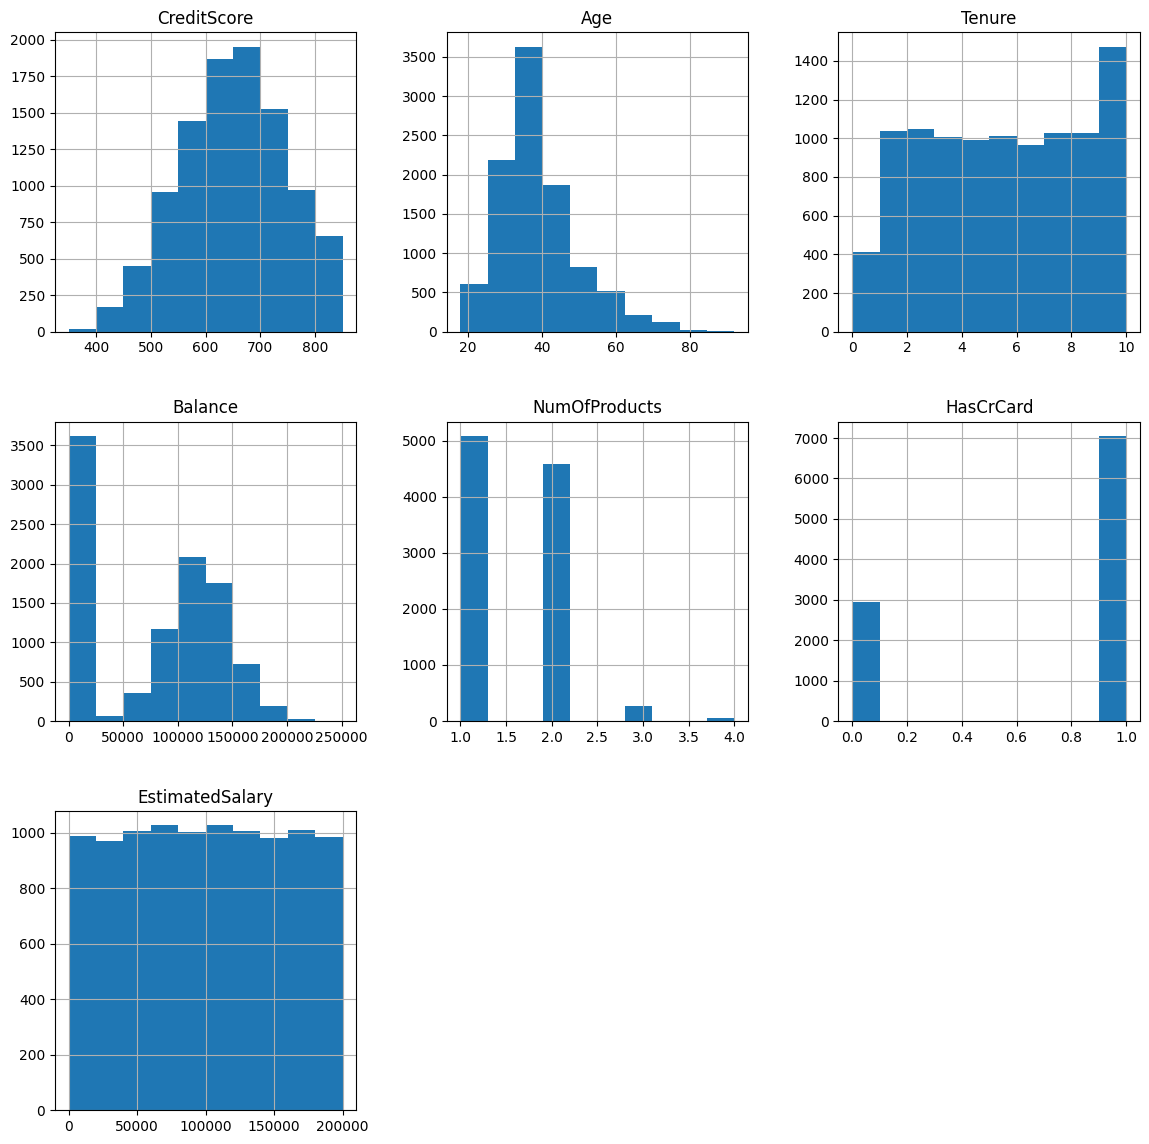

In [51]:
data_EDA[numeric_cols].hist(figsize=(14, 14))
plt.show()

In [52]:
data_EDA.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard IsActiveMember  EstimatedSalary Exited HasCrCard   
0          1              1        101348.88      1          1  
1          0              1        112542.58      0          0  
2          1              0        113931.57      1          1  
3          0              0         93826.63      0          0  
4          1              1         79084.10      0          1

In [53]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

**Age Versus Tenure**

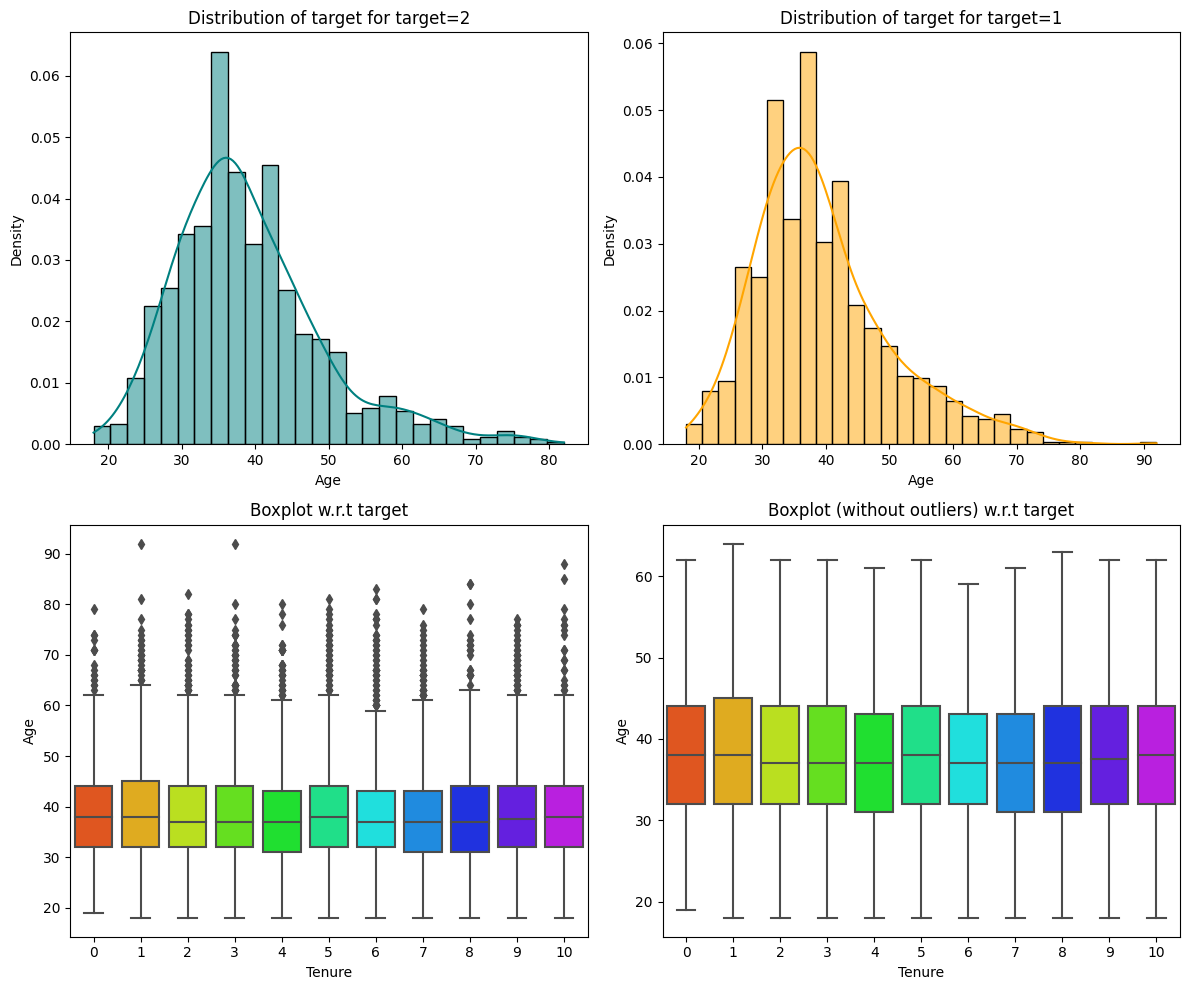

In [54]:
distribution_plot_wrt_target(data_EDA, "Age", "Tenure")

Tenure has outliers generally after 60 years old , but generally changes between age 30-50

**Total Credit Cards Versus Total Visits To Bank**

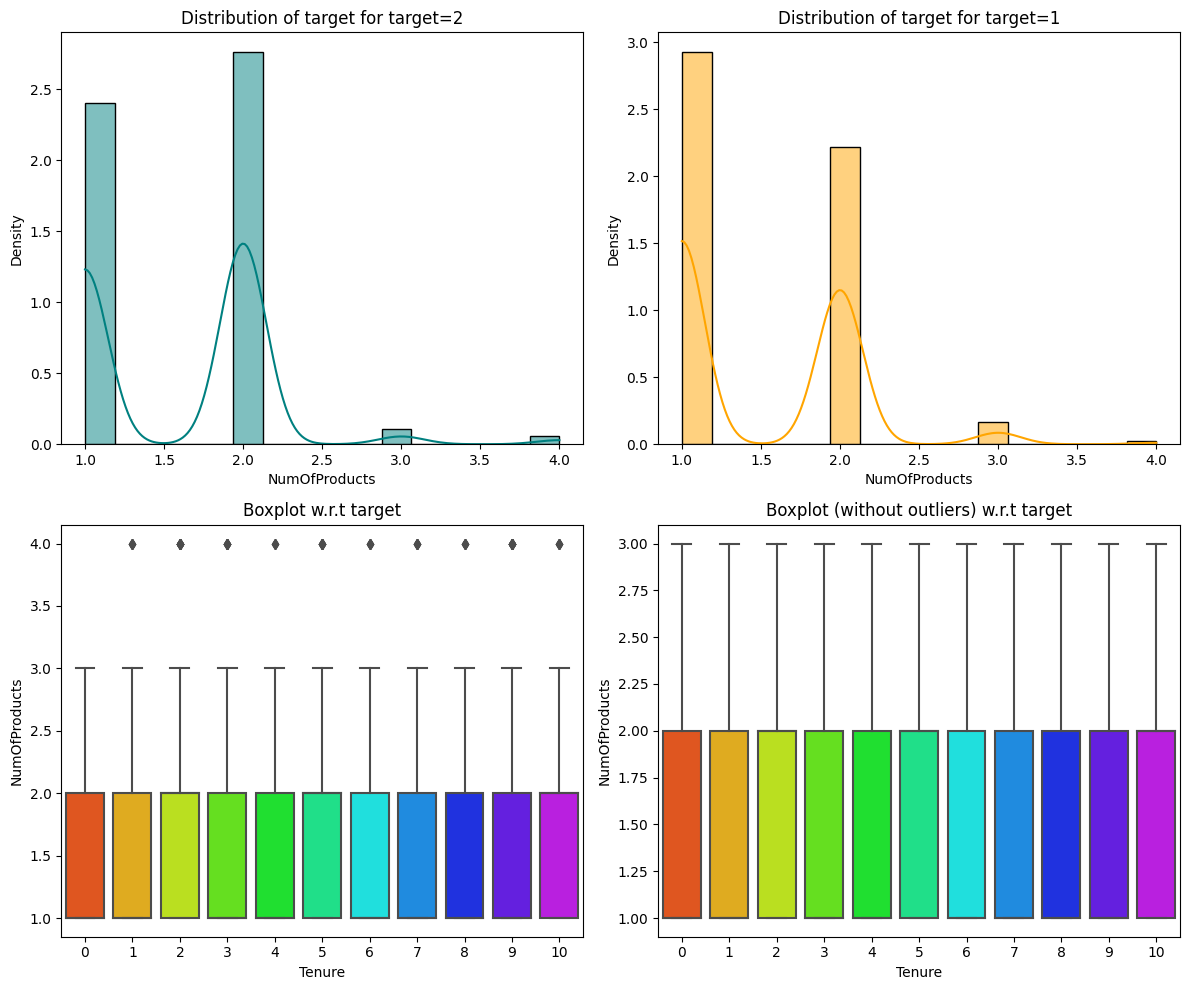

In [55]:
distribution_plot_wrt_target(data_EDA, "NumOfProducts", "Tenure")

Number of products may have outliers when tenure increases


In [56]:
#num_col = data_EDA.select_dtypes(include=np.number).columns.tolist()
#for item in num_col:
#    labeled_barplot(data_EDA, item, perc=True)

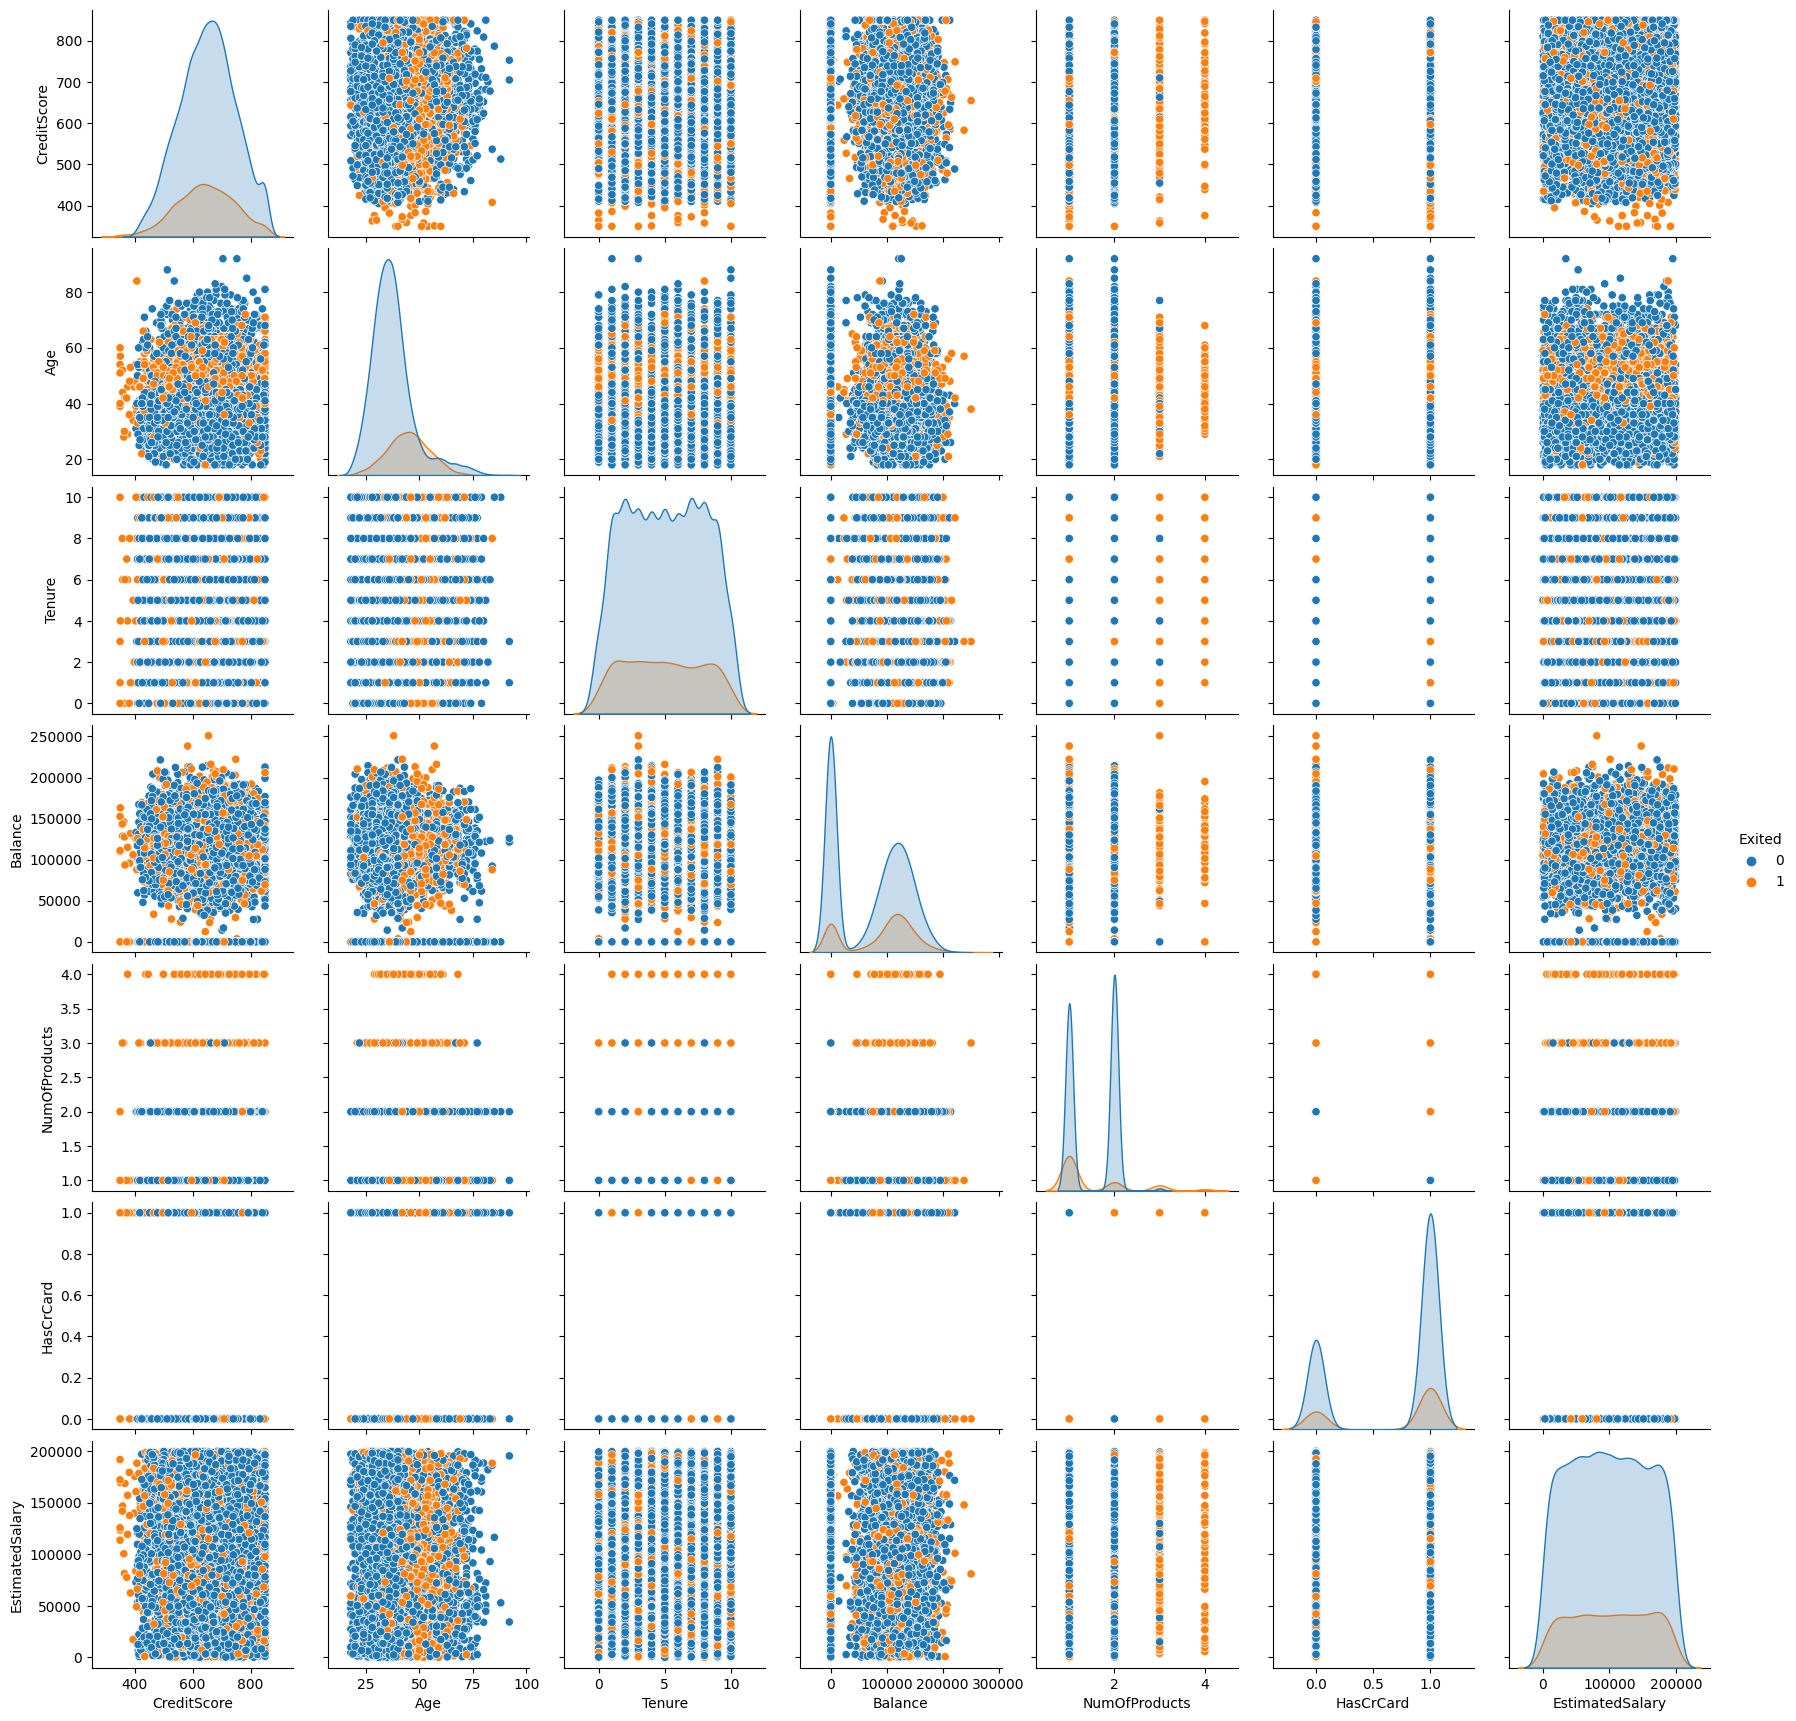

In [57]:
sns.pairplot(data=data_EDA,hue="Exited", diag_kind="kde")
plt.show()

In [58]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [59]:
data_EDA.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard IsActiveMember  EstimatedSalary Exited HasCrCard   
0          1              1        101348.88      1          1  
1          0              1        112542.58      0          0  
2          1              0        113931.57      1          1  
3          0              0         93826.63      0          0  
4          1              1         79084.10      0          1

**Ditribution Of Age**

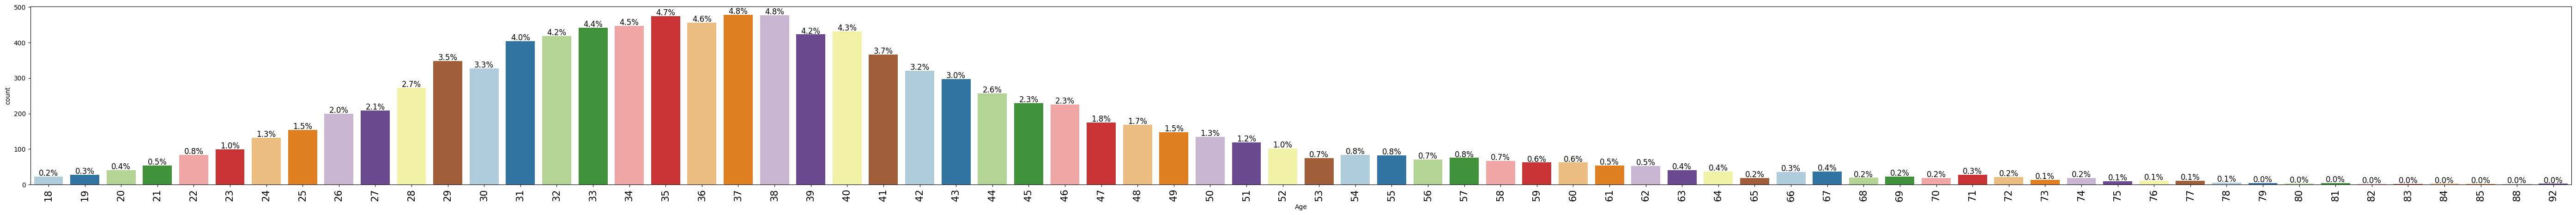

In [60]:
labeled_barplot(data_EDA, "Age", perc=True)

%23.9 of customers visits bank and is the highest frequency group

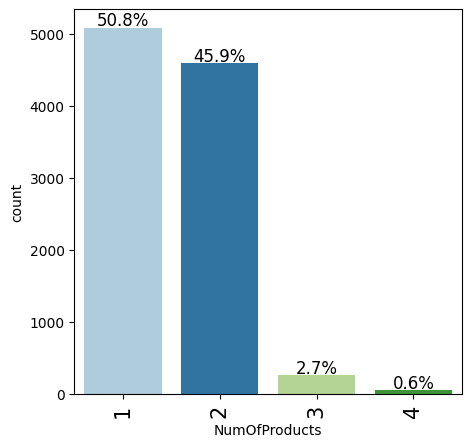

In [61]:
labeled_barplot(data_EDA, "NumOfProducts", perc=True)

%28.6 percentage of group visits 2 times with having highest frequencey

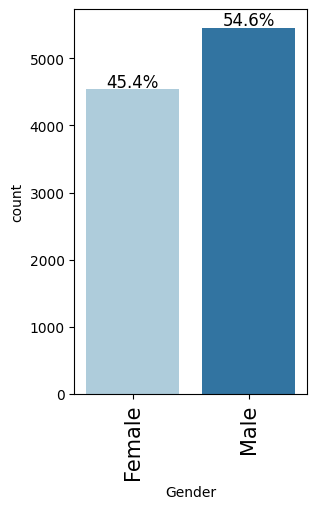

In [62]:
labeled_barplot(data_EDA, "Gender", perc=True)

##4-DATA PREPROSESSING

In [64]:
data_preprocess=data_EDA.copy()

4.1 **Imputing Missing Values :**

No missing values exits at data set

4.2 **Splitting Data Set Into Train and Test**

In [65]:
data_preprocess

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard IsActiveMember  EstimatedSalary Exited HasCrCard   
0             1              1        101348.88      1          1  
1             0              1        112542.58      0          0  
2             1              0        113931.57      1          1  
3             0              0         93826.63      0          0  
4             1              1         79084.10      0          1  
...         ...            ...              ...    ...        ...  
9995          1              0         96270.64      0          1  
9996          1              1        101699.77      0          1  
9997          0              1         42085.58      1          0  
9998          1              0         92888.52      1          1  
9999          1              0         38190.78      0          1  

[10000 rows x 12 columns]

In [66]:
X = data_preprocess.drop('Exited',axis=1)
Y = data_preprocess['Exited']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1,stratify = Y)

In [68]:
print(X_train.shape,X_test.shape)

(8000, 11) (2000, 11)


In [69]:
print("Exited value ratio in y")
print(Y.value_counts(1))
print("*" * 80)
print("Exited value ratio in y_train")
print(y_train.value_counts(1))
print("*" * 80)
print("Exited value ratio in y_test")
print(y_test.value_counts(1))
print("*" * 80)

Exited value ratio in y
0    0.7963
1    0.2037
Name: Exited, dtype: float64
********************************************************************************
Exited value ratio in y_train
0    0.79625
1    0.20375
Name: Exited, dtype: float64
********************************************************************************
Exited value ratio in y_test
0    0.7965
1    0.2035
Name: Exited, dtype: float64
********************************************************************************


4.3 **Fixing Outliers In Training and Test Data Set**

In [70]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

4.4 Fixing Outliers on Training Data Set

In [71]:
numerical_col=X_train.select_dtypes(include=np.number).columns.tolist()

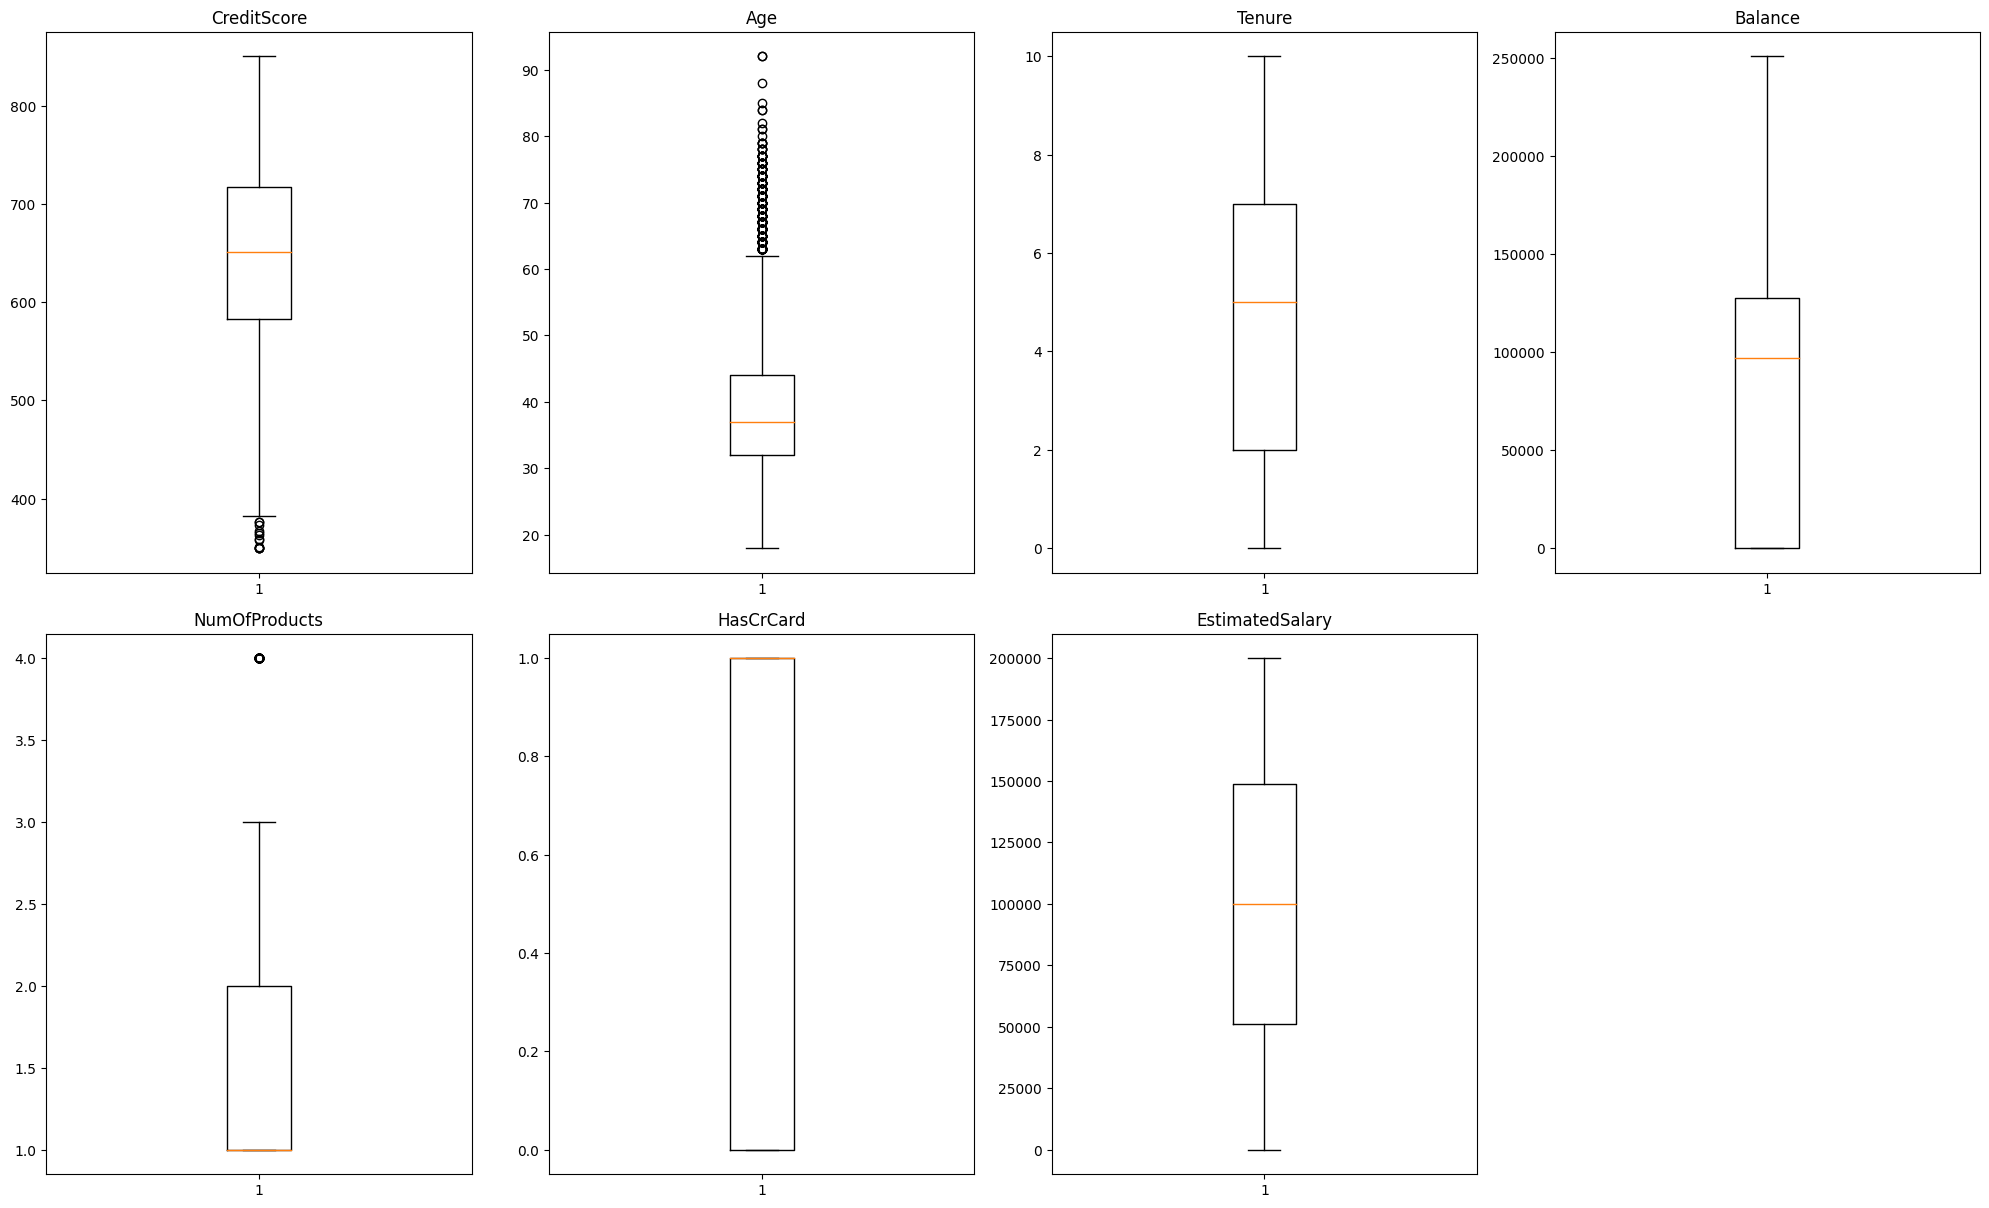

In [72]:
numerical_col = X_train.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(X_train[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

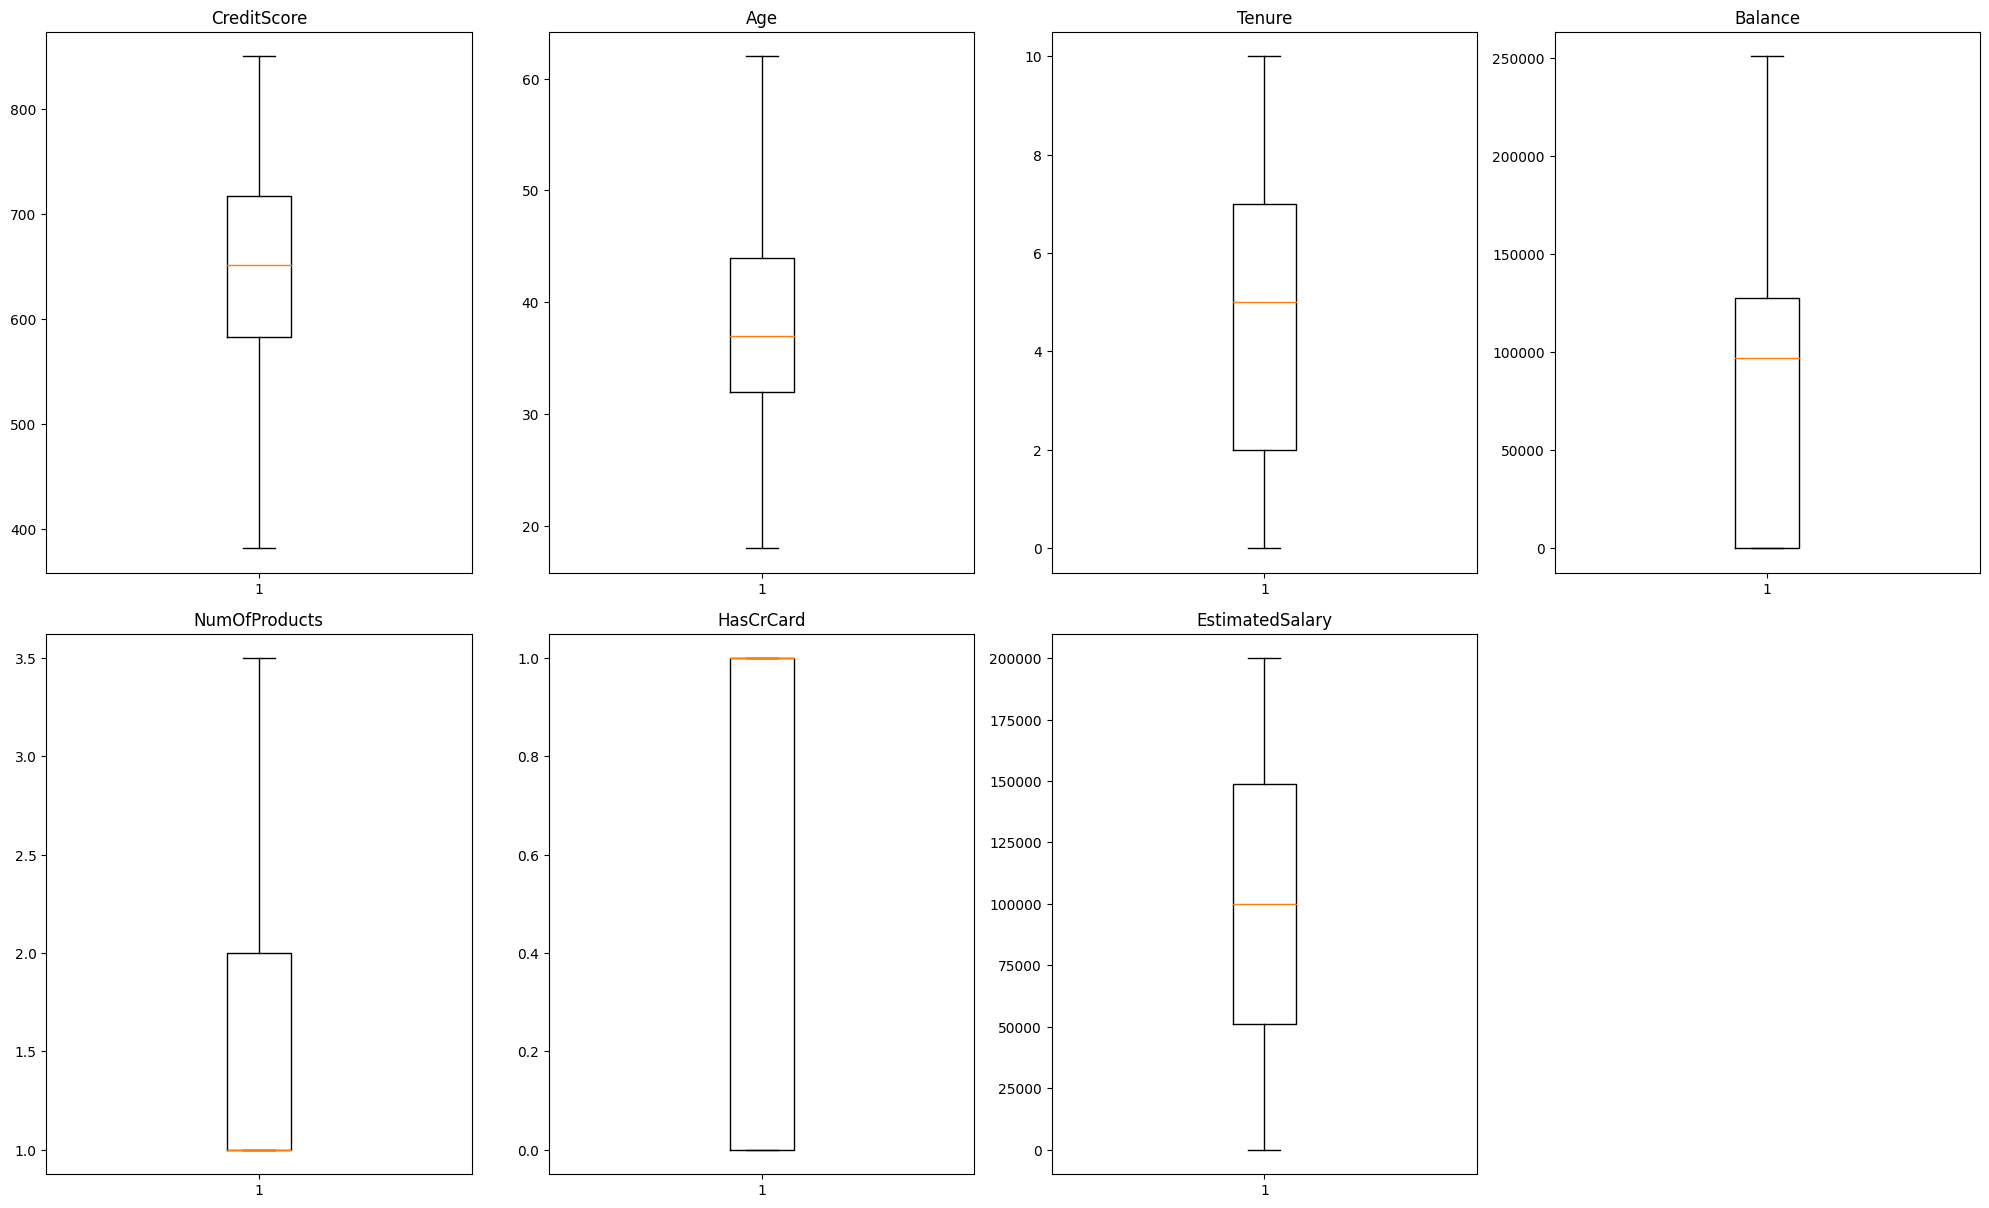

In [73]:
numerical_col = X_train.select_dtypes(include=np.number).columns.tolist()
X_val = treat_outliers_all(X_train, numerical_col)
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(X_val[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Outliers Fixed on Training Data Set

4.5 Fixing Outliers on Test Data Set

In [74]:
numerical_col=X_test.select_dtypes(include=np.number).columns.tolist()

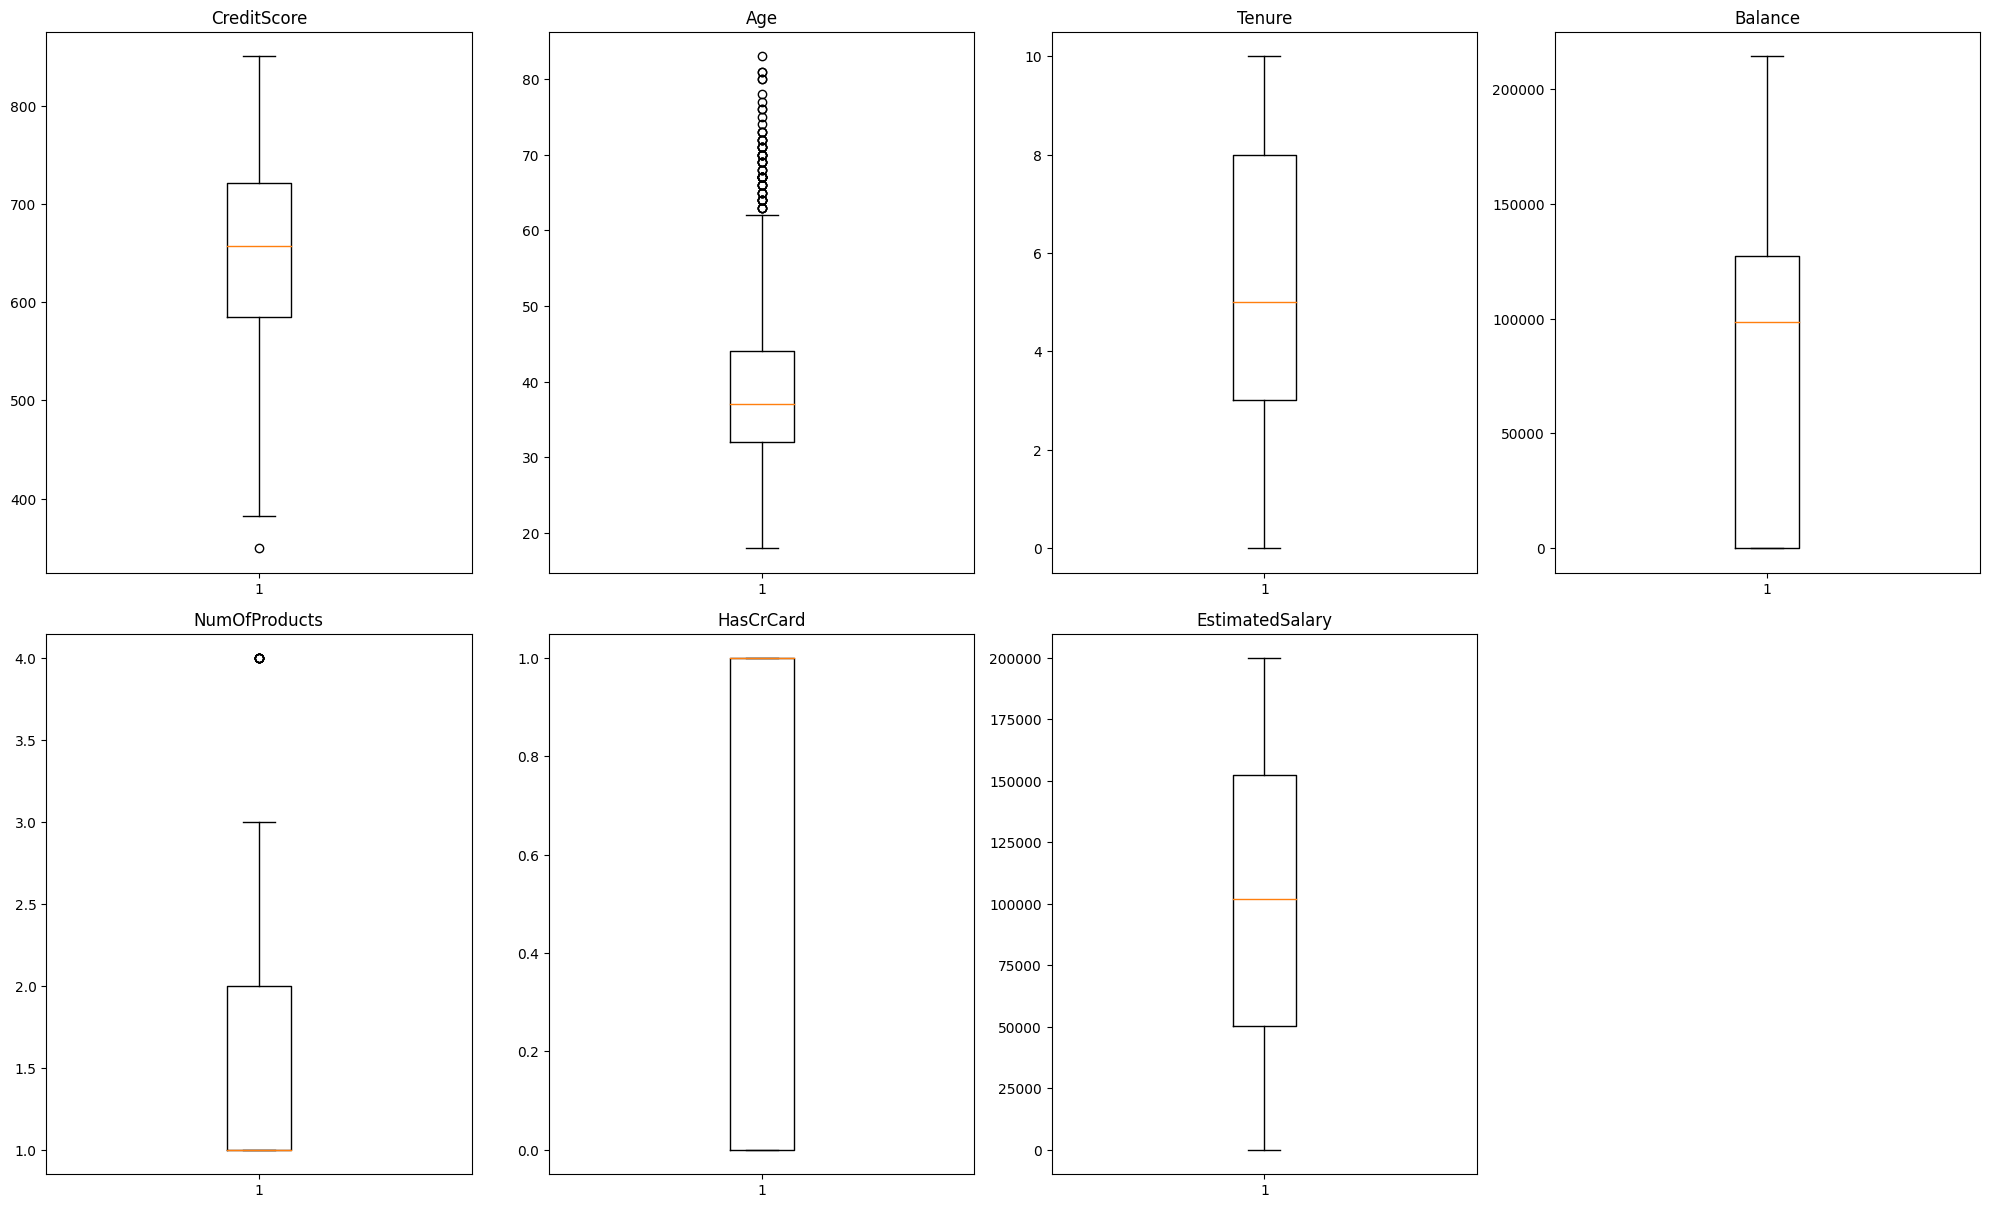

In [75]:
numerical_col = X_test.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(X_test[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

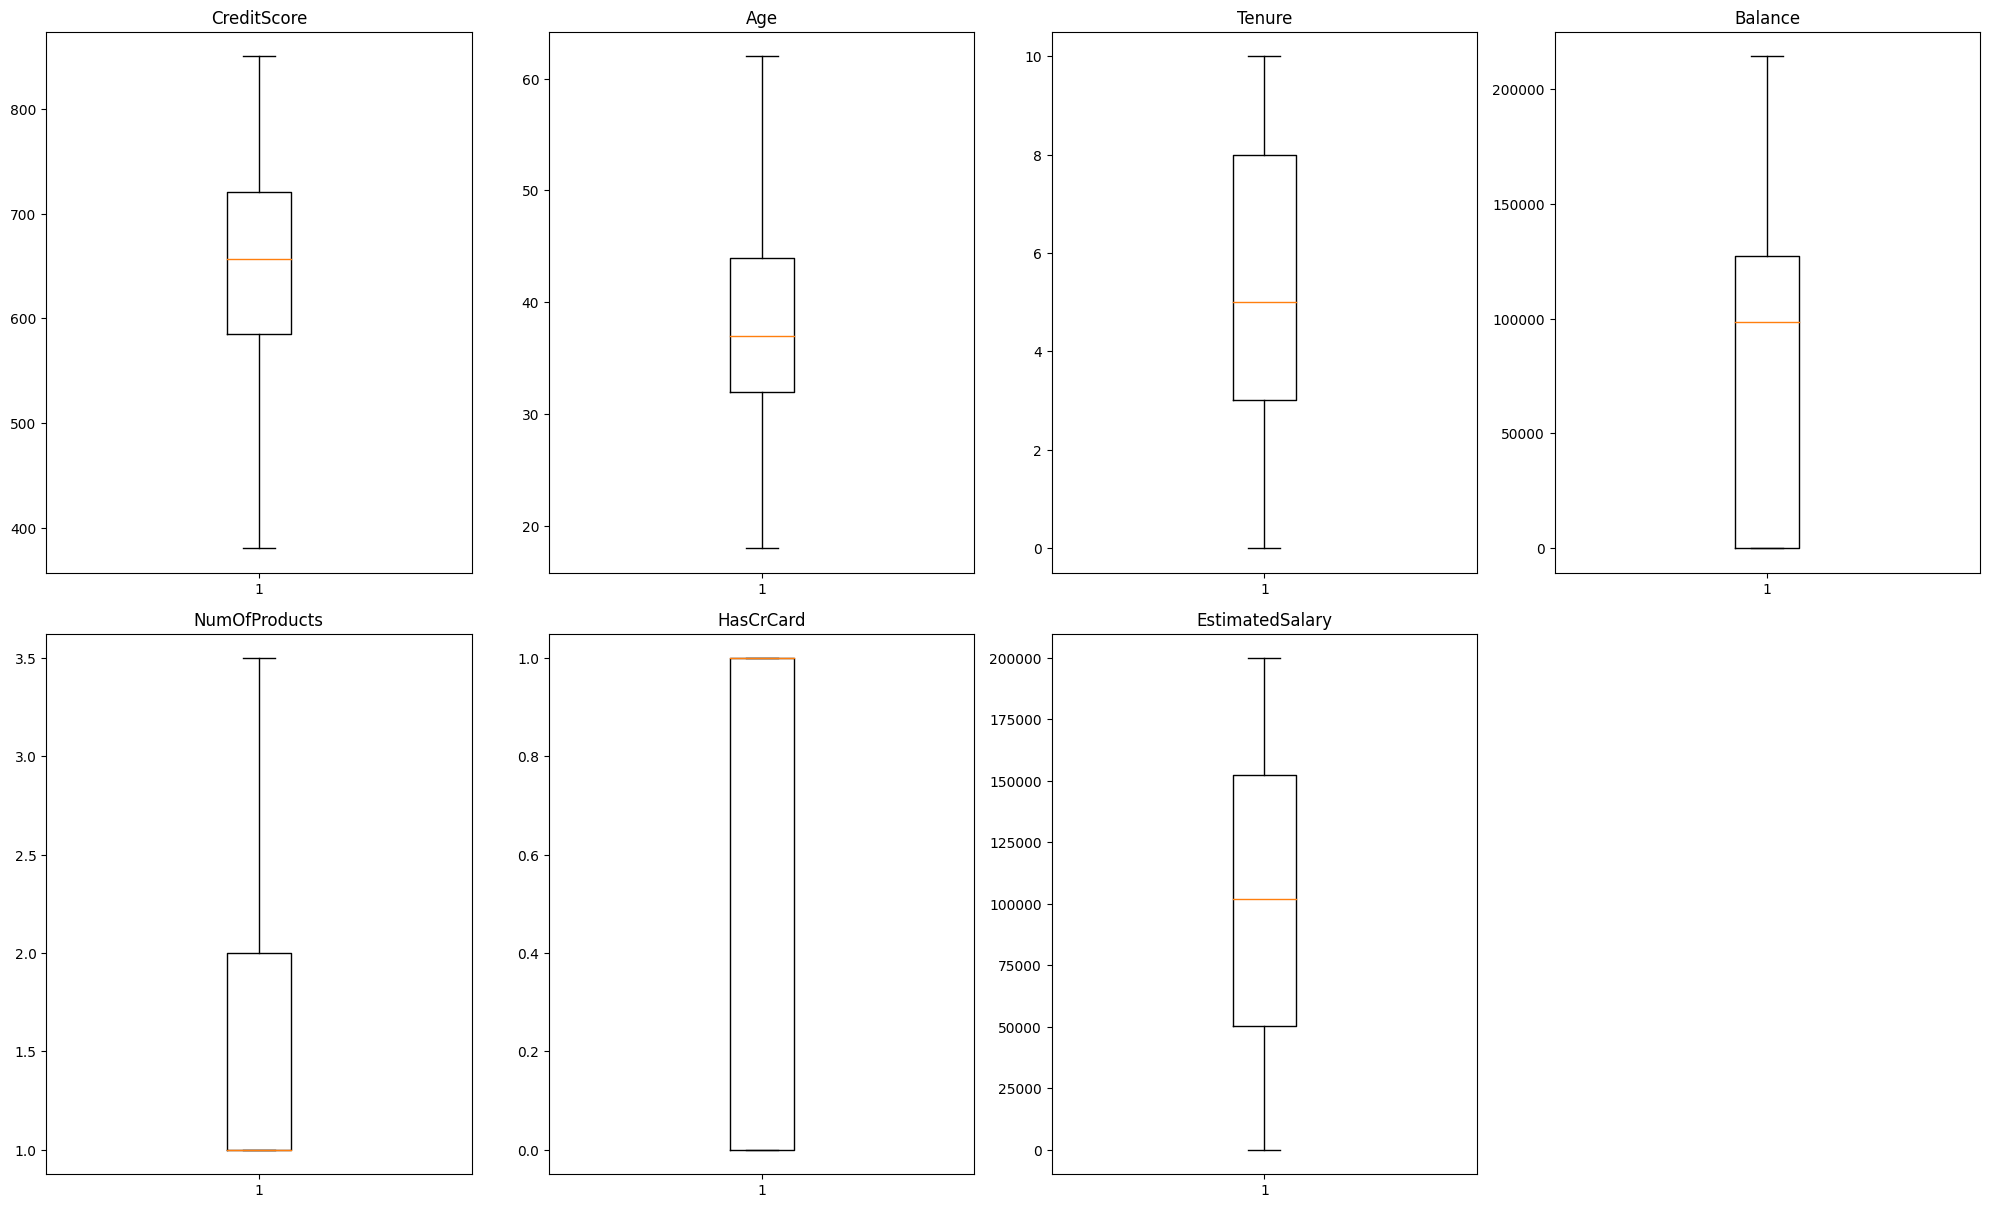

In [76]:
numerical_col = X_test.select_dtypes(include=np.number).columns.tolist()
X_val = treat_outliers_all(X_test, numerical_col)
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(X_val[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Outliers Fixed on X_Test Data Set

4.6 One Hot Encoding For Categorical Values On Training Data Set

In [77]:
X_train__one_hot_encoding = pd.get_dummies(X_train, drop_first=True)

In [78]:
X_train__one_hot_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 4256 to 8407
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        8000 non-null   int64  
 1   Age                8000 non-null   int64  
 2   Tenure             8000 non-null   int64  
 3   Balance            8000 non-null   float64
 4   NumOfProducts      8000 non-null   float64
 5   HasCrCard          8000 non-null   int64  
 6   EstimatedSalary    8000 non-null   float64
 7   Geography_Germany  8000 non-null   uint8  
 8   Geography_Spain    8000 non-null   uint8  
 9   Gender_Male        8000 non-null   uint8  
 10  IsActiveMember_1   8000 non-null   uint8  
 11  HasCrCard _1       8000 non-null   uint8  
dtypes: float64(3), int64(4), uint8(5)
memory usage: 539.1 KB


In [79]:
X_train__one_hot_encoding

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
4256          596   62       9  134208.25            1.0          1   
9151          614   49       1       0.00            2.0          1   
696           445   62       1   64119.38            1.0          1   
4898          544   40       7       0.00            1.0          0   
6427          746   37       2       0.00            2.0          1   
...           ...  ...     ...        ...            ...        ...   
5090          474   30       9       0.00            2.0          0   
9358          837   29       9       0.00            2.0          1   
9583          602   34       8   98382.72            1.0          1   
451           850   40       9       0.00            2.0          0   
8407          726   28       2       0.00            1.0          0   

      EstimatedSalary  Geography_Germany  Geography_Spain  Gender_Male  \
4256         13455.43                  0                1            0   
9151        192440.54                  0                0            1   
696          76569.64                  0                1            1   
4898        161076.92                  0                0            0   
6427        143194.05                  0                0            1   
...               ...                ...              ...          ...   
5090         63158.22                  0                0            0   
9358         41866.26                  0                0            0   
9583         39542.00                  0                1            1   
451         119232.33                  0                0            1   
8407         98060.51                  0                0            1   

      IsActiveMember_1  HasCrCard _1  
4256                 1             1  
9151                 0             1  
696                  1             1  
4898                 1             0  
6427                 0             1  
...                ...           ...  
5090                 0             0  
9358                 1             1  
9583                 0             1  
451                  1             0  
8407                 0             0  

[8000 rows x 12 columns]

In [80]:
X_train=X_train__one_hot_encoding

In [81]:
X_test__one_hot_encoding = pd.get_dummies(X_test, drop_first=True)

In [82]:
X_test__one_hot_encoding

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
4466          413   35       2       0.00            2.0          1   
3754          535   35       8  118989.92            1.0          1   
9601          659   33       7   89939.62            1.0          1   
9758          556   43       4  125890.72            1.0          1   
8577          754   62       1  136186.44            1.0          1   
...           ...  ...     ...        ...            ...        ...   
7788          551   62       2  128410.71            2.0          1   
1650          625   34       6       0.00            2.0          0   
1276          635   37       5  113488.68            1.0          1   
1043          579   35       1       0.00            2.0          1   
8350          556   38       2  114756.14            1.0          1   

      EstimatedSalary  Geography_Germany  Geography_Spain  Gender_Male  \
4466         60972.84                  0                1            1   
3754        135536.72                  0                1            1   
9601        136540.09                  0                0            0   
9758         74854.97                  1                0            0   
8577        121529.59                  1                0            1   
...               ...                ...              ...          ...   
7788        181718.73                  0                1            1   
1650        197283.20                  0                0            1   
1276         95611.74                  1                0            1   
1043          4460.20                  0                0            1   
8350        193214.05                  0                0            1   

      IsActiveMember_1  HasCrCard _1  
4466                 1             1  
3754                 1             1  
9601                 0             1  
9758                 1             1  
8577                 1             1  
...                ...           ...  
7788                 1             1  
1650                 0             0  
1276                 0             1  
1043                 0             1  
8350                 0             1  

[2000 rows x 12 columns]

In [83]:
X_test=X_test__one_hot_encoding

4.2 Scale Data Set

Scaling Data is important step for unsupervised learning  process to avoid the problem of one feature dominating over others due to unsupervised learning algorithm uses distance to find the similarity between data points.

1. Data standardization is the process of rescaling the attributes so that they have a mean of 0 and a variance of 1.
2. The ultimate goal to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values.
3. In sklearn.preprocessing.StandardScaler(), centering and scaling happen independently on each feature.

In [84]:
sc = StandardScaler()


In [85]:
X_train_Scaled = pd.DataFrame(
    sc.fit_transform(X_train),
)


In [86]:
X_train_Scaled.head()

0         1         2         3         4         5         6   \
0 -0.557541  2.382989  1.380964  0.925750 -0.928601  0.649397 -1.505216   
1 -0.371218  1.056207 -1.376312 -1.219862  0.821000  0.649397  1.614655   
2 -2.120583  2.382989 -1.376312 -0.194773 -0.928601  0.649397 -0.405078   
3 -1.095807  0.137666  0.691645 -1.219862 -0.928601 -1.539890  1.067959   
4  0.995149 -0.168514 -1.031652 -1.219862  0.821000  0.649397  0.756245   

        7         8         9         10        11  
0 -0.57812  1.737844 -1.095269  0.967285  0.649397  
1 -0.57812 -0.575426  0.913017 -1.033822  0.649397  
2 -0.57812  1.737844  0.913017  0.967285  0.649397  
3 -0.57812 -0.575426 -1.095269  0.967285 -1.539890  
4 -0.57812 -0.575426  0.913017 -1.033822  0.649397

In [87]:
X_test_Scaled = pd.DataFrame(
    sc.fit_transform(X_test),
)


In [88]:
X_test_Scaled

0         1         2         3         4         5         6   \
0    -2.495465 -0.387968 -1.083480 -1.250284  0.863835  0.632898 -0.693331   
1    -1.228784 -0.387968  1.019684  0.676315 -0.909954  0.632898  0.591288   
2     0.058662 -0.597709  0.669157  0.205954 -0.909954  0.632898  0.608574   
3    -1.010749  0.450995 -0.382425  0.788048 -0.909954  0.632898 -0.454164   
4     1.045012  2.443534 -1.434008  0.954749 -0.909954  0.632898  0.349967   
...        ...       ...       ...       ...       ...       ...       ...   
1995 -1.062662  2.443534 -1.083480  0.828850  0.863835  0.632898  1.386932   
1996 -0.294348 -0.492839  0.318629 -1.250284  0.863835 -1.580033  1.655083   
1997 -0.190521 -0.178227 -0.031898  0.587243 -0.909954  0.632898 -0.096557   
1998 -0.771948 -0.387968 -1.434008 -1.250284  0.863835  0.632898 -1.666956   
1999 -1.010749 -0.073357 -1.083480  0.607765 -0.909954  0.632898  1.584978   

            7         8         9         10        11  
0    -0.581199  1.762605  0.910029  0.982159  0.632898  
1    -0.581199  1.762605  0.910029  0.982159  0.632898  
2    -0.581199 -0.567342 -1.098866 -1.018165  0.632898  
3     1.720580 -0.567342 -1.098866  0.982159  0.632898  
4     1.720580 -0.567342  0.910029  0.982159  0.632898  
...        ...       ...       ...       ...       ...  
1995 -0.581199  1.762605  0.910029  0.982159  0.632898  
1996 -0.581199 -0.567342  0.910029 -1.018165 -1.580033  
1997  1.720580 -0.567342  0.910029 -1.018165  0.632898  
1998 -0.581199 -0.567342  0.910029 -1.018165  0.632898  
1999 -0.581199 -0.567342  0.910029 -1.018165  0.632898  

[2000 rows x 12 columns]

In [89]:
X_train=X_train_Scaled

In [90]:
X_test=X_test_Scaled

##5-MODEL BUILDING

In this model predicting the customers who are willing to leave the bank is improtant since it may cause a financial impact for the bank.

`RECALL` Metric important in this model based on False Negatives. If the model predicts the customers who are willing to leave as NOT ; this may cause a financial impact for the bank.

So, I will take consideration of **RECALL** score to capture False Negative impact for the bank rather than **Precision** (Operational Costs)

##5.1-MODEL(1)

In [91]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [92]:
# Initializing the model
model = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model.add(Dense(activation = 'relu',kernel_initializer='he_uniform', input_dim = X_train.shape[1], units=64))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model.add(Dense(32,kernel_initializer='he_uniform',activation='relu'))
# Adding the output layer
model.add(Dense(1, activation = 'sigmoid'))

Initiating the model with SGD Optimizer and learning_rate of 1e-3

In [93]:
optprm = keras.optimizers.SGD(learning_rate=1e-3)

In [94]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer=optprm, loss='binary_crossentropy', metrics=['accuracy'])

In [95]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,945
Trainable params: 2,945
Non-trainable params: 0
_________________________________________________________________


In [96]:
history=model.fit(X_train, y_train,
          validation_split=0.2,
          epochs=20,
          batch_size=32,verbose=1)

Epoch 1/20
200/200 [==============================] - 4s 3ms/step - loss: 0.6263 - accuracy: 0.6938 - val_loss: 0.5848 - val_accuracy: 0.7225
Epoch 2/20
200/200 [==============================] - 0s 2ms/step - loss: 0.5809 - accuracy: 0.7461 - val_loss: 0.5601 - val_accuracy: 0.7544
Epoch 3/20
200/200 [==============================] - 0s 2ms/step - loss: 0.5584 - accuracy: 0.7633 - val_loss: 0.5437 - val_accuracy: 0.7700
Epoch 4/20
200/200 [==============================] - 0s 2ms/step - loss: 0.5424 - accuracy: 0.7759 - val_loss: 0.5305 - val_accuracy: 0.7719
Epoch 5/20
200/200 [==============================] - 0s 2ms/step - loss: 0.5296 - accuracy: 0.7852 - val_loss: 0.5194 - val_accuracy: 0.7763
Epoch 6/20
200/200 [==============================] - 0s 2ms/step - loss: 0.5189 - accuracy: 0.7891 - val_loss: 0.5098 - val_accuracy: 0.7806
Epoch 7/20
200/200 [==============================] - 0s 2ms/step - loss: 0.5097 - accuracy: 0.7931 - val_loss: 0.5017 - val_accuracy: 0.7812
Epoch 

63/63 [==============================] - 0s 3ms/step - loss: 0.4484 - accuracy: 0.8115


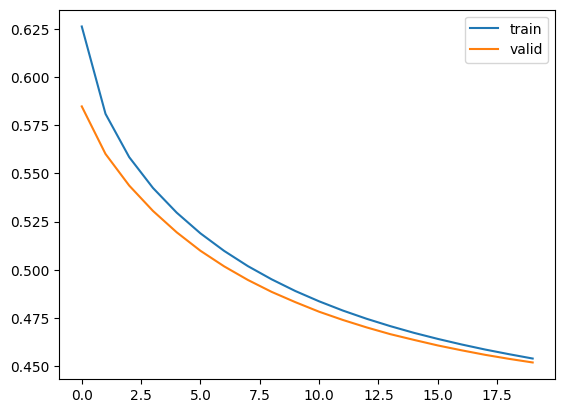

In [98]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model.evaluate(X_test, y_test)

Between EPOC 0 and 10 Validation and Test data goes paralel but than noice increases on Validation data set

Lets set threshold value 0.5 and test the score

In [100]:
y_pred=model.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

63/63 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [104]:
#Accuracy as per the classification report
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1593
           1       0.68      0.14      0.23       407

    accuracy                           0.81      2000
   macro avg       0.75      0.56      0.56      2000
weighted avg       0.79      0.81      0.76      2000



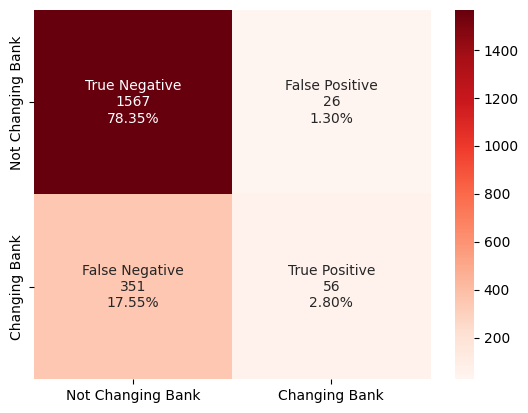

In [113]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
#labels = ['True Positive','False Negative','False Positive','True Negative']
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Changing Bank','Changing Bank']
make_confusion_matrix(cm,
                      group_names=labels,
                      categories=categories,
                      cmap='Reds')

`RECALL` of prediction is not good which is 0.21 , lets check with ROC Curve

X Axis are PREDICTED , Y AXIS ARE TRUTH

63/63 [==============================] - 0s 1ms/step
Best Threshold=0.238600, G-Mean=0.673


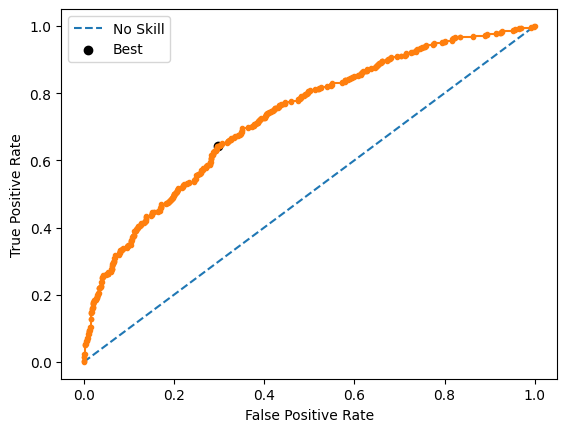

In [143]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat = model.predict(X_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [144]:
#Predicting the results using best as a threshold
y_pred_e=model.predict(X_test)
y_pred_e = (y_pred_e > thresholds1[ix])
y_pred_e

63/63 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

In [145]:
#Accuracy as per the classification report
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred_e)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.70      0.78      1593
           1       0.36      0.64      0.46       407

    accuracy                           0.69      2000
   macro avg       0.62      0.67      0.62      2000
weighted avg       0.78      0.69      0.72      2000



With new threshold value `RECALL` Value Jumped to 0.64 from 0.14..

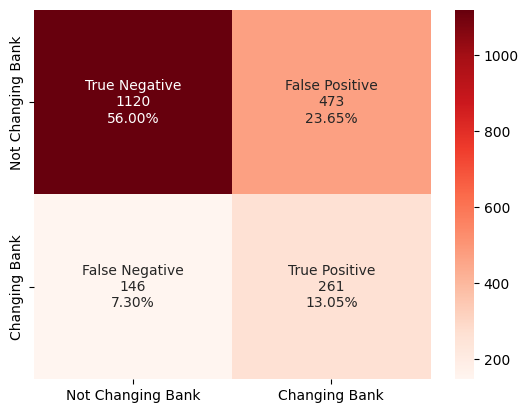

In [146]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_e)
#labels = ['True Positive','False Negative','False Positive','True Negative']
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Changing Bank','Changing Bank']
make_confusion_matrix(cm,
                      group_names=labels,
                      categories=categories,
                      cmap='Reds')

New confision matrix with best threshold

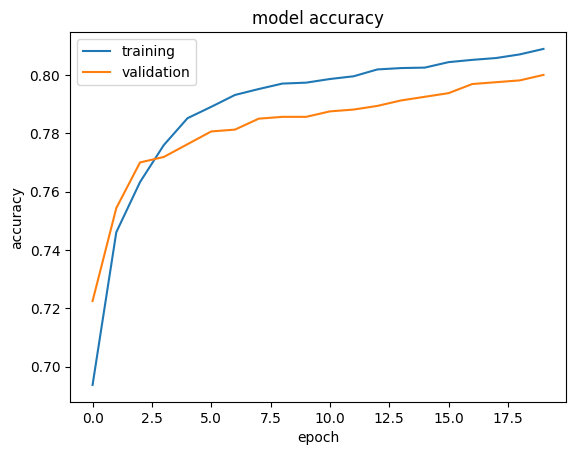

In [147]:
loss, accuracy  = model.evaluate(X_test, y_test, verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

Model Accuracy goes nearly parallel until between 2-3 EPOC than disturtion of validation increases

##5.2-MODEL(2)

In [160]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

Adding more hidden layers with RELU activarion and he_uniform weight initalization . Will use ADAM as optimizer

In [161]:
# Initializing the model
model1 = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model1.add(Dense(64,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model1.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
# Adding the Output Layer with binary classification Sigmoid Function
model1.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function
optimizer = tf.keras.optimizers.Adam(0.001)
model1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [162]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,945
Trainable params: 2,945
Non-trainable params: 0
_________________________________________________________________


Model fitting on 50 EPOCS and 64 BatchSize

In [163]:
history1 = model1.fit(X_train,y_train,batch_size=64,epochs=20,verbose=1,validation_split = 0.2)

Epoch 1/20
100/100 [==============================] - 2s 4ms/step - loss: 0.4893 - accuracy: 0.7894 - val_loss: 0.4347 - val_accuracy: 0.8106
Epoch 2/20
100/100 [==============================] - 0s 3ms/step - loss: 0.4209 - accuracy: 0.8209 - val_loss: 0.4134 - val_accuracy: 0.8219
Epoch 3/20
100/100 [==============================] - 0s 3ms/step - loss: 0.4001 - accuracy: 0.8295 - val_loss: 0.3959 - val_accuracy: 0.8325
Epoch 4/20
100/100 [==============================] - 0s 3ms/step - loss: 0.3826 - accuracy: 0.8395 - val_loss: 0.3795 - val_accuracy: 0.8500
Epoch 5/20
100/100 [==============================] - 0s 3ms/step - loss: 0.3663 - accuracy: 0.8494 - val_loss: 0.3683 - val_accuracy: 0.8481
Epoch 6/20
100/100 [==============================] - 0s 3ms/step - loss: 0.3541 - accuracy: 0.8562 - val_loss: 0.3595 - val_accuracy: 0.8594
Epoch 7/20
100/100 [==============================] - 0s 3ms/step - loss: 0.3469 - accuracy: 0.8612 - val_loss: 0.3561 - val_accuracy: 0.8537
Epoch 

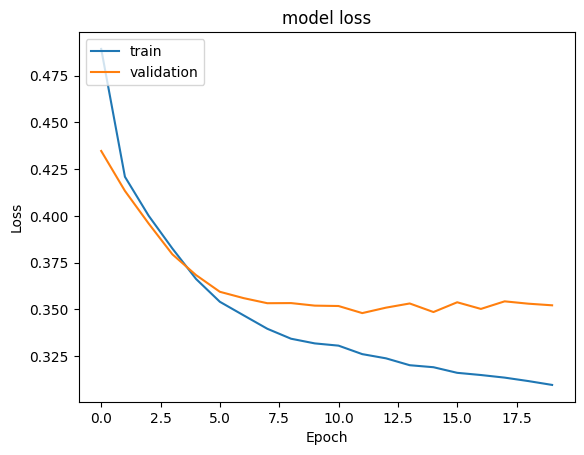

In [164]:
#Plotting Train Loss vs Validation Loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**OBSERVATION :**
Approaching to 5th EPOC noice starting to increase

63/63 [==============================] - 0s 1ms/step
Best Threshold=0.214210, G-Mean=0.760


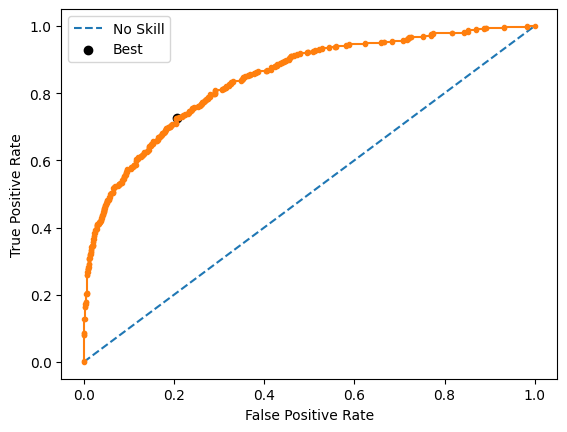

In [165]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat1 = model1.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

I will tune the threshold using ROC-AUC

There are many ways we could locate the threshold with the optimal balance between false positive and true positive rates.

Firstly, the true positive rate is called the Sensitivity. The inverse of the false-positive rate is called the Specificity.

Sensitivity = True Positive / (True Positive + False Negative)

Specificity = True Negative / (False Positive + True Negative)

Where:

Sensitivity = True Positive Rate

Specificity = 1 – False Positive Rate

The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

G-Mean = sqrt(Sensitivity * Specificity)

One approach would be to test the model with each threshold returned from the call roc_auc_score(),

and select the threshold with the largest G-Mean value.

In [166]:
#Predicting the results using best as a threshold
y_pred_e1=model1.predict(X_test)
y_pred_e1 = (y_pred_e1 > thresholds1[ix])
y_pred_e1

63/63 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

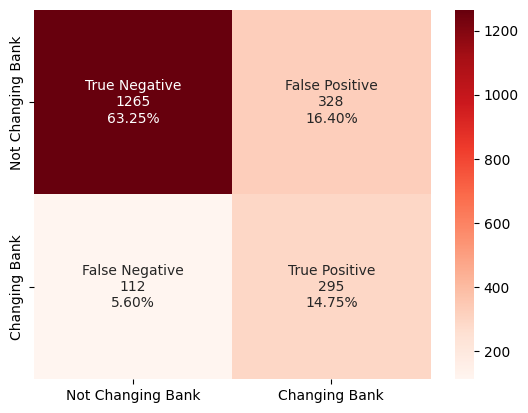

In [228]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test, y_pred_e1)
#labels = ['True Positive','False Negative','False Positive','True Negative']
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Changing Bank','Changing Bank']
make_confusion_matrix(cm1,
                      group_names=labels,
                      categories=categories,
                      cmap='Reds')

MODEL 2 PERFORMANCE OBSERVATIONS:

We can see that `RECALL` increased to 0.72 from 0.64 (MODEL 1)

In this MODEL we used ADAM optimizer and increased the EPOC number to 50 and batch size to 64

In [168]:
#Accuracy as per the classification report
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred_e1)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1593
           1       0.47      0.72      0.57       407

    accuracy                           0.78      2000
   macro avg       0.70      0.76      0.71      2000
weighted avg       0.83      0.78      0.80      2000



MODEL 1 VRS MODEL 2

In [169]:
#Accuracy as per the classification report
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred_e)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.70      0.78      1593
           1       0.36      0.64      0.46       407

    accuracy                           0.69      2000
   macro avg       0.62      0.67      0.62      2000
weighted avg       0.78      0.69      0.72      2000



### Model 3 - BATCH NORMALIZATION TECHNIQUE

In [191]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [192]:
# Initializing the model
model2 = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model2.add(Dense(64,activation='relu',input_dim = X_train.shape[1]))
#Adding Batch Normalization Layer
model2.add(BatchNormalization())
# Adding the first hidden layer with 64 neurons, relu as activation function and, he_uniform as weight initializer
model2.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
#Adding Output Layer
model2.add(Dense(1, activation = 'sigmoid'))

In [193]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,201
Trainable params: 3,073
Non-trainable params: 128
_________________________________________________________________


Choosing ADAM Optimizer with Lerning Rate of 0.001

In [194]:
optimizer = tf.keras.optimizers.Adam(0.001)
model2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

Chhosing 50 EPOCS and Batch Size of 64

In [195]:
history_2 = model2.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 2s 5ms/step - loss: 0.4798 - accuracy: 0.7869 - val_loss: 0.4664 - val_accuracy: 0.8194
Epoch 2/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3951 - accuracy: 0.8295 - val_loss: 0.4081 - val_accuracy: 0.8450
Epoch 3/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3661 - accuracy: 0.8466 - val_loss: 0.3684 - val_accuracy: 0.8581
Epoch 4/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3499 - accuracy: 0.8528 - val_loss: 0.3496 - val_accuracy: 0.8575
Epoch 5/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3396 - accuracy: 0.8605 - val_loss: 0.3466 - val_accuracy: 0.8631
Epoch 6/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3369 - accuracy: 0.8570 - val_loss: 0.3468 - val_accuracy: 0.8612
Epoch 7/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3358 - accuracy: 0.8600 - val_loss: 0.3451 - val_accuracy: 0.8606
Epoch 

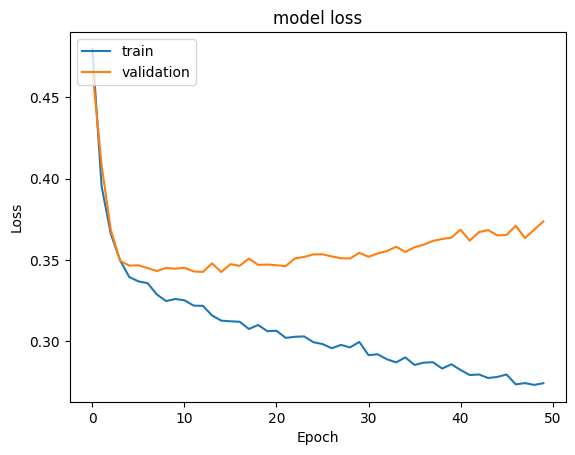

In [196]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Between 0 And 10 EPOCS TRAIN and Validation Set shows same behaviour but than noice increases on Validation set

63/63 [==============================] - 0s 1ms/step
Best Threshold=0.147188, G-Mean=0.754


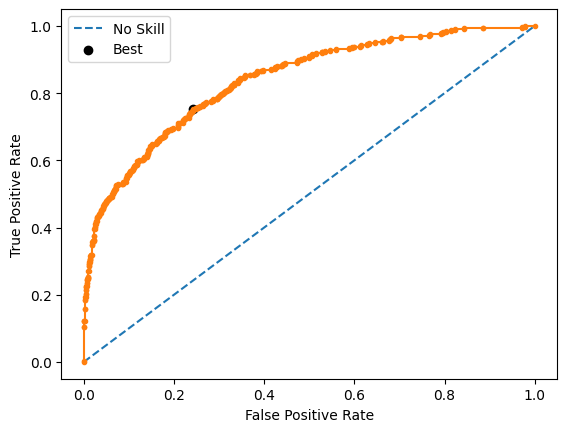

In [197]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat2 = model2.predict(X_test)
# keep probabilities for the positive outcome only
yhat2 = yhat2[:, 0]
# calculate roc curves
fpr, tpr, thresholds2 = roc_curve(y_test, yhat2)
# calculate the g-mean for each threshold
gmeans2 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans2)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds2[ix], gmeans2[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

Best Threshold shows 0.147188

In [198]:
y_pred_e2=model2.predict(X_test)
y_pred_e2 = (y_pred_e2 > thresholds2[ix])
y_pred_e2

63/63 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

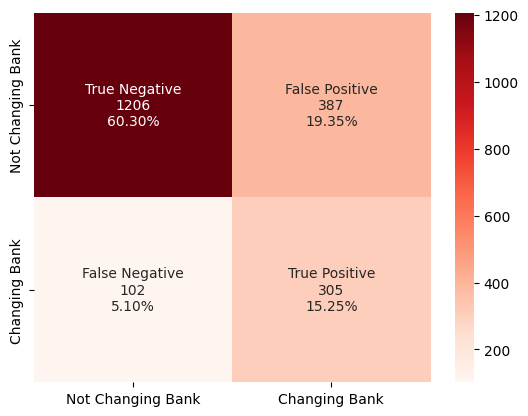

In [227]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_test, y_pred_e2)
#labels = ['True Positive','False Negative','False Positive','True Negative']
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Changing Bank','Changing Bank']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Reds')

In [200]:
#Accuracy as per the classification report
from sklearn import metrics
cr2=metrics.classification_report(y_test,y_pred_e2)
print(cr2)

              precision    recall  f1-score   support

           0       0.92      0.76      0.83      1593
           1       0.44      0.75      0.56       407

    accuracy                           0.76      2000
   macro avg       0.68      0.75      0.69      2000
weighted avg       0.82      0.76      0.78      2000



Our **RECALL** Score increased %3 from last model and reached 0.75

### Model 4 DROPOUT TECHNIQUE

In [207]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [208]:
# Initializing the model
model3 = Sequential()
# Adding input layer with 128 neurons, relu as activation function and, he_uniform as weight initializer.
model3.add(Dense(128,activation='relu',input_dim = X_train.shape[1]))
#Adding DropOut with %20 Ratio
model3.add(Dropout(0.2))
#Adding hidden layer with 128 Neurons
model3.add(Dense(64,activation='relu'))
#Adding Dropout
model3.add(Dropout(0.2))
#Adding hidden layer with 64 Neurons
model3.add(Dense(32,activation='relu'))
#Adding Output Layer
model3.add(Dense(1, activation = 'sigmoid'))

In [209]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,033
Trainable params: 12,033
Non-traina

Optimizer wil be ADAM and Leraning Rate is 0.001

In [210]:
optimizer = tf.keras.optimizers.Adam(0.001)
model3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

Initating 50 EPOCS with 64 Batch Size

In [211]:
history_3 = model3.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 2s 5ms/step - loss: 0.4914 - accuracy: 0.7814 - val_loss: 0.4331 - val_accuracy: 0.8156
Epoch 2/50
100/100 [==============================] - 0s 4ms/step - loss: 0.4190 - accuracy: 0.8231 - val_loss: 0.3960 - val_accuracy: 0.8413
Epoch 3/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3866 - accuracy: 0.8408 - val_loss: 0.3595 - val_accuracy: 0.8550
Epoch 4/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3631 - accuracy: 0.8512 - val_loss: 0.3481 - val_accuracy: 0.8575
Epoch 5/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3532 - accuracy: 0.8536 - val_loss: 0.3518 - val_accuracy: 0.8525
Epoch 6/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3517 - accuracy: 0.8550 - val_loss: 0.3527 - val_accuracy: 0.8556
Epoch 7/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3523 - accuracy: 0.8553 - val_loss: 0.3539 - val_accuracy: 0.8550
Epoch 

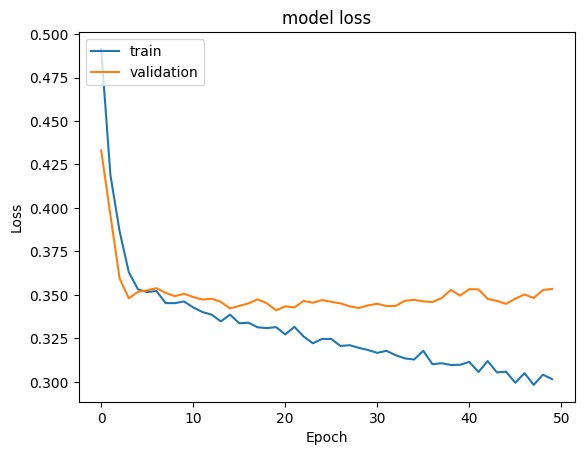

In [212]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Train and Valiation set shows same pattern but Valisation set showing overfit and noise

63/63 [==============================] - 0s 1ms/step
Best Threshold=0.134758, G-Mean=0.773


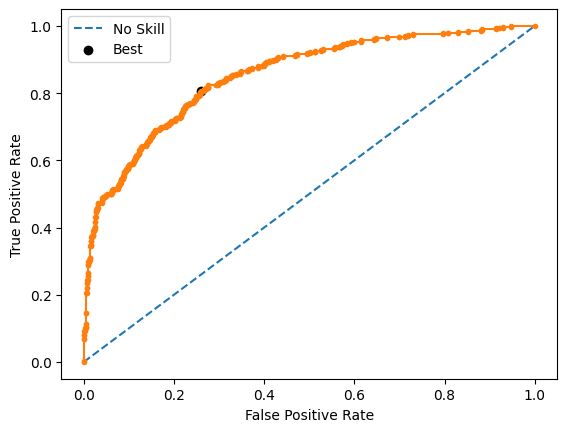

In [213]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat3 = model3.predict(X_test)
# keep probabilities for the positive outcome only
yhat3 = yhat3[:, 0]
# calculate roc curves
fpr, tpr, thresholds3 = roc_curve(y_test, yhat3)
# calculate the g-mean for each threshold
gmeans3 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans3)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds3[ix], gmeans3[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [214]:
y_pred_e3=model3.predict(X_test)
y_pred_e3 = (y_pred_e3 > thresholds3[ix])
y_pred_e3

63/63 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

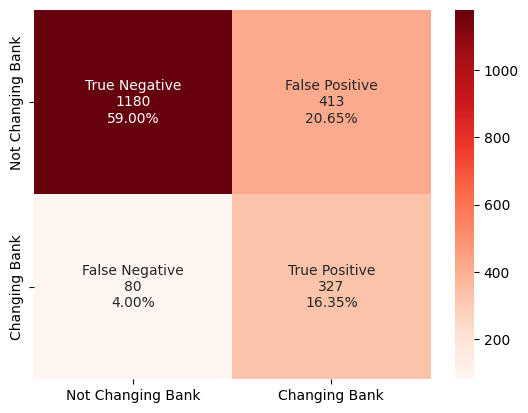

In [229]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm3=confusion_matrix(y_test, y_pred_e3)
#labels = ['True Positive','False Negative','False Positive','True Negative']
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Changing Bank','Changing Bank']
make_confusion_matrix(cm3,
                      group_names=labels,
                      categories=categories,
                      cmap='Reds')

In [216]:
#Accuracy as per the classification report
from sklearn import metrics
cr3=metrics.classification_report(y_test,y_pred_e3)
print(cr3)

              precision    recall  f1-score   support

           0       0.94      0.74      0.83      1593
           1       0.44      0.80      0.57       407

    accuracy                           0.75      2000
   macro avg       0.69      0.77      0.70      2000
weighted avg       0.84      0.75      0.77      2000



`RECALL` increased to 0.80 with optimzied threshold value. Old model score was 0.75 so we improved our model with using DROPOUT Method

### Model 5 Random Search CV Hyper Paremeter Tuning

In [217]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [218]:
def create_model_v4(lr,batch_size):
    np.random.seed(1337)
    #Initiating the model
    model = Sequential()
    #Adding input layer with 256 neurons, relu as activation function and, he_uniform as weight initializer.
    model.add(Dense(256,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
    #Adding Dropout with ratio of 0.3
    model.add(Dropout(0.3))
    #Adding hidden layer with 128 Neurons
    model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    #Adding Dropout with ratio of 0.3
    model.add(Dropout(0.3))
    #Adding hidden layer with 64 Neurons
    model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
    #Adding Dropout with ratio of 0.3
    model.add(Dropout(0.2))
    #Adding hidden layer with 32 Neurons
    model.add(Dense(32,activation='relu'))
    #Adding Output Layer
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

Try to optimize BATCH Size , Learning Rate and EPOCS

In [219]:
keras_estimator = KerasClassifier(build_fn=create_model_v4, verbose=1)
# define the grid search parameters
param_random = {
    'batch_size':[32, 64, 128],
    "lr":[0.01,0.1,0.001],
    'epochs': [10, 20, 30, 40]}

kfold_splits = 3
random= RandomizedSearchCV(estimator=keras_estimator,
                    verbose=1,
                    cv=kfold_splits,
                    param_distributions=param_random,n_jobs=-1)

In [220]:
random_result = random.fit(X_train, y_train,validation_split=0.2,verbose=1)

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/20
100/100 [==============================] - 2s 5ms/step - loss: 0.4938 - accuracy: 0.7886 - val_loss: 0.4304 - val_accuracy: 0.8181
Epoch 2/20
100/100 [==============================] - 0s 4ms/step - loss: 0.4466 - accuracy: 0.8095 - val_loss: 0.4162 - val_accuracy: 0.8450
Epoch 3/20
100/100 [==============================] - 0s 4ms/step - loss: 0.4222 - accuracy: 0.8248 - val_loss: 0.3902 - val_accuracy: 0.8431
Epoch 4/20
100/100 [==============================] - 0s 4ms/step - loss: 0.4087 - accuracy: 0.8302 - val_loss: 0.3847 - val_accuracy: 0.8550
Epoch 5/20
100/100 [==============================] - 0s 4ms/step - loss: 0.3882 - accuracy: 0.8406 - val_loss: 0.3604 - val_accuracy: 0.8587
Epoch 6/20
100/100 [==============================] - 0s 4ms/step - loss: 0.3800 - accuracy: 0.8428 - val_loss: 0.3629 - val_accuracy: 0.8606
Epoch 7/20
100/100 [==============================] - 0s 4ms/step - loss: 0.3737 - accu

Grid Search CV gave the best parameters as EPOCHS: 20 LR: 0.001 Batch_Size: 64

In [221]:
estimator_v4=create_model_v4(batch_size=random_result.best_params_['batch_size'],lr=random_result.best_params_['lr'])

estimator_v4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               3328      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [222]:
optimizer = tf.keras.optimizers.Adam(random_result.best_params_['lr'])
estimator_v4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_4=estimator_v4.fit(X_train, y_train, epochs=random_result.best_params_['epochs'], batch_size = random_result.best_params_['batch_size'], verbose=1,validation_split=0.2)

Epoch 1/20
100/100 [==============================] - 2s 5ms/step - loss: 0.4835 - accuracy: 0.7958 - val_loss: 0.4286 - val_accuracy: 0.8194
Epoch 2/20
100/100 [==============================] - 0s 4ms/step - loss: 0.4343 - accuracy: 0.8127 - val_loss: 0.3903 - val_accuracy: 0.8438
Epoch 3/20
100/100 [==============================] - 0s 4ms/step - loss: 0.4081 - accuracy: 0.8278 - val_loss: 0.3678 - val_accuracy: 0.8581
Epoch 4/20
100/100 [==============================] - 0s 4ms/step - loss: 0.3929 - accuracy: 0.8369 - val_loss: 0.3685 - val_accuracy: 0.8625
Epoch 5/20
100/100 [==============================] - 0s 4ms/step - loss: 0.3825 - accuracy: 0.8416 - val_loss: 0.3617 - val_accuracy: 0.8544
Epoch 6/20
100/100 [==============================] - 0s 4ms/step - loss: 0.3721 - accuracy: 0.8467 - val_loss: 0.3573 - val_accuracy: 0.8600
Epoch 7/20
100/100 [==============================] - 0s 4ms/step - loss: 0.3683 - accuracy: 0.8489 - val_loss: 0.3578 - val_accuracy: 0.8575
Epoch 

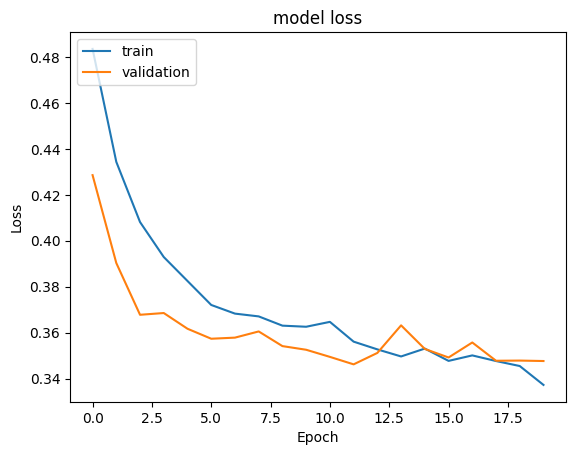

In [223]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

63/63 [==============================] - 0s 2ms/step
Best Threshold=0.233733, G-Mean=0.767


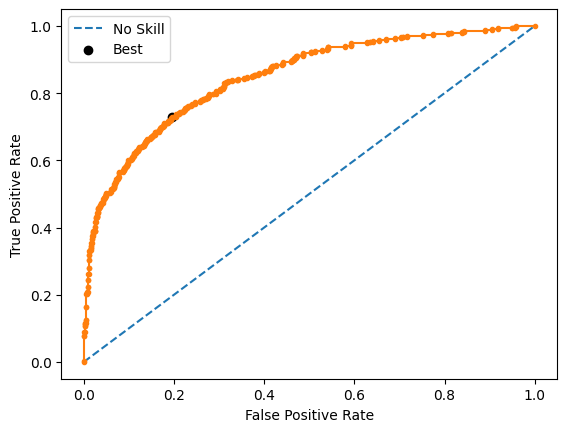

In [224]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat4 = estimator_v4.predict(X_test)
# keep probabilities for the positive outcome only
yhat4 = yhat4[:, 0]
# calculate roc curves
fpr, tpr, thresholds4 = roc_curve(y_test, yhat4)
# calculate the g-mean for each threshold
gmeans4 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans4)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds4[ix], gmeans4[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

Best threshold value is 0.233

In [225]:
y_pred_e4=estimator_v4.predict(X_test)
y_pred_e4 = (y_pred_e4 > thresholds4[ix])
y_pred_e4

63/63 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

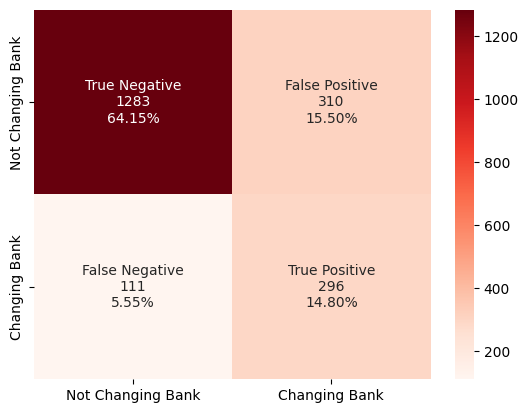

In [230]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm4=confusion_matrix(y_test, y_pred_e4)
#labels = ['True Positive','False Negative','False Positive','True Negative']
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Changing Bank','Changing Bank']
make_confusion_matrix(cm4,
                      group_names=labels,
                      categories=categories,
                      cmap='Reds')

In [231]:
#Accuracy as per the classification report
from sklearn import metrics
cr4=metrics.classification_report(y_test,y_pred_e4)
print(cr4)

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1593
           1       0.49      0.73      0.58       407

    accuracy                           0.79      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.83      0.79      0.80      2000



Our RECALL score decreased from 0.80 to 0.73 at this model

### Model 6 Grid Search CV Hyper Paremeter Tuning

In [232]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [234]:
def create_model_v5(lr,batch_size):
    np.random.seed(1337)
    #Initiating the model
    model = Sequential()
    #Adding input layer with 256 neurons, relu as activation function and, he_uniform as weight initializer.
    model.add(Dense(256,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
    #Adding Dropout with ratio of 0.3
    model.add(Dropout(0.3))
    #Adding hidden layer with 128 Neurons
    model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    #Adding Dropout with ratio of 0.3
    model.add(Dropout(0.3))
    #Adding hidden layer with 64 Neurons
    model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
    #Adding Dropout with ratio of 0.3
    model.add(Dropout(0.2))
    #Adding hidden layer with 32 Neurons
    model.add(Dense(32,activation='relu'))
    #Adding Output Layer
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [236]:
keras_estimator = KerasClassifier(build_fn=create_model_v5, verbose=1)
# define the grid search parameters
param_grid = {
    'batch_size':[32, 64, 128],
    "lr":[0.01,0.1,0.001],
    'epochs': [10, 20, 30, 40,50]}

kfold_splits = 3
grid= GridSearchCV(estimator=keras_estimator,
                    verbose=1,
                    cv=kfold_splits,
                    param_grid=param_grid,n_jobs=-1)

In [237]:
import time

# store starting time
begin = time.time()


grid_result = grid.fit(X_train, y_train,validation_split=0.2,verbose=1)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

time.sleep(1)
# store end time
end = time.time()

# total time taken
print(f"Total runtime of the program is {end - begin}")

Fitting 3 folds for each of 45 candidates, totalling 135 fits
Epoch 1/10
50/50 [==============================] - 2s 7ms/step - loss: 0.4915 - accuracy: 0.7916 - val_loss: 0.4399 - val_accuracy: 0.8125
Epoch 2/10
50/50 [==============================] - 0s 4ms/step - loss: 0.4163 - accuracy: 0.8259 - val_loss: 0.3665 - val_accuracy: 0.8569
Epoch 3/10
50/50 [==============================] - 0s 4ms/step - loss: 0.3837 - accuracy: 0.8434 - val_loss: 0.3525 - val_accuracy: 0.8569
Epoch 4/10
50/50 [==============================] - 0s 4ms/step - loss: 0.3693 - accuracy: 0.8494 - val_loss: 0.3545 - val_accuracy: 0.8625
Epoch 5/10
50/50 [==============================] - 0s 4ms/step - loss: 0.3653 - accuracy: 0.8528 - val_loss: 0.3463 - val_accuracy: 0.8631
Epoch 6/10
50/50 [==============================] - 0s 4ms/step - loss: 0.3588 - accuracy: 0.8481 - val_loss: 0.3504 - val_accuracy: 0.8581
Epoch 7/10
50/50 [==============================] - 0s 4ms/step - loss: 0.3605 - accuracy: 0.8503 

Best parameters of Grid Search CV are EPOCHS=10 BATCH SIZE=128 lr=0.01

In [238]:
estimator_v5=create_model_v5(batch_size=grid_result.best_params_['batch_size'],lr=grid_result.best_params_['lr'])

estimator_v5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               3328      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [239]:
optimizer = tf.keras.optimizers.Adam(grid_result.best_params_['lr'])
estimator_v5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_5=estimator_v5.fit(X_train, y_train, epochs=grid_result.best_params_['epochs'], batch_size = grid_result.best_params_['batch_size'], verbose=1,validation_split=0.2)

Epoch 1/10
50/50 [==============================] - 2s 7ms/step - loss: 0.4766 - accuracy: 0.7995 - val_loss: 0.4231 - val_accuracy: 0.8344
Epoch 2/10
50/50 [==============================] - 0s 4ms/step - loss: 0.4034 - accuracy: 0.8345 - val_loss: 0.3622 - val_accuracy: 0.8537
Epoch 3/10
50/50 [==============================] - 0s 4ms/step - loss: 0.3815 - accuracy: 0.8456 - val_loss: 0.3683 - val_accuracy: 0.8487
Epoch 4/10
50/50 [==============================] - 0s 4ms/step - loss: 0.3694 - accuracy: 0.8472 - val_loss: 0.3637 - val_accuracy: 0.8525
Epoch 5/10
50/50 [==============================] - 0s 4ms/step - loss: 0.3718 - accuracy: 0.8542 - val_loss: 0.3557 - val_accuracy: 0.8550
Epoch 6/10
50/50 [==============================] - 0s 4ms/step - loss: 0.3549 - accuracy: 0.8541 - val_loss: 0.3675 - val_accuracy: 0.8562
Epoch 7/10
50/50 [==============================] - 0s 4ms/step - loss: 0.3592 - accuracy: 0.8530 - val_loss: 0.3609 - val_accuracy: 0.8525
Epoch 8/10
50/50 [==

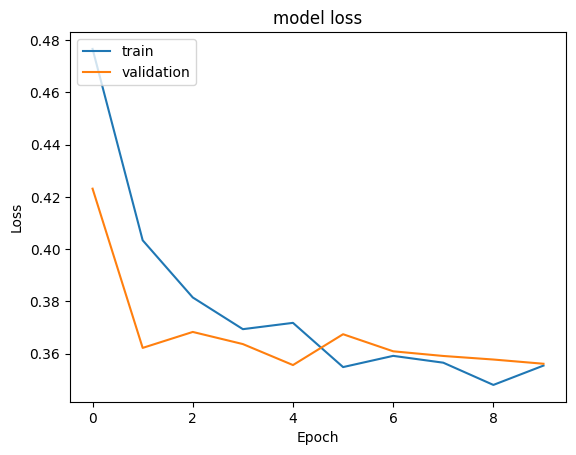

In [240]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Train and Validation shows same pattern but there is a noise exits at Validation set

63/63 [==============================] - 0s 1ms/step
Best Threshold=0.209468, G-Mean=0.762


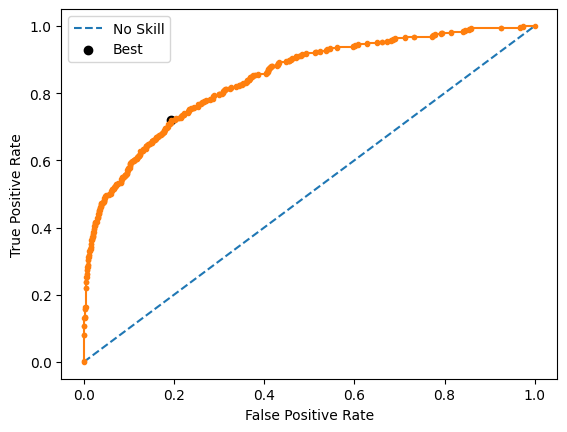

In [241]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat5 = estimator_v5.predict(X_test)
# keep probabilities for the positive outcome only
yhat5 = yhat5[:, 0]
# calculate roc curves
fpr, tpr, thresholds5 = roc_curve(y_test, yhat5)
# calculate the g-mean for each threshold
gmeans5 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans5)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds5[ix], gmeans5[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [242]:
y_pred_e5=estimator_v5.predict(X_test)
y_pred_e5 = (y_pred_e5 > thresholds5[ix])
y_pred_e5

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

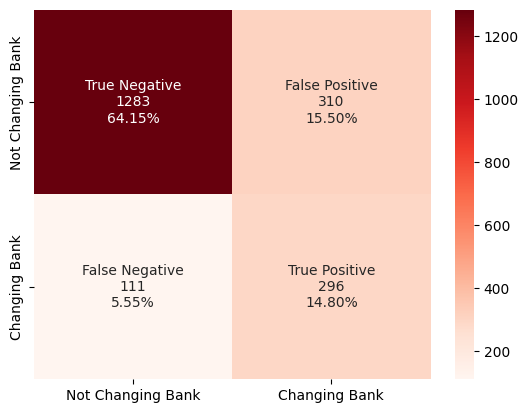

In [243]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm5=confusion_matrix(y_test, y_pred_e4)
#labels = ['True Positive','False Negative','False Positive','True Negative']
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Changing Bank','Changing Bank']
make_confusion_matrix(cm5,
                      group_names=labels,
                      categories=categories,
                      cmap='Reds')

In [244]:
#Accuracy as per the classification report
from sklearn import metrics
cr5=metrics.classification_report(y_test,y_pred_e5)
print(cr5)

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1593
           1       0.49      0.72      0.58       407

    accuracy                           0.79      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.83      0.79      0.80      2000



Recall is 0.72 and not improved beyond 0.80 which we got before models

###*Keras* Tuner

In [249]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

Defining model as a function

In [250]:
def build_model(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

Initating the tuner to select the best model

In [251]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
     project_name='Job_')

In [252]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [253]:
### Searching the best model on X and y train
tuner.search(X_train, y_train,
             epochs=5,
             validation_split = 0.2)

Trial 5 Complete [00h 00m 27s]
val_accuracy: 0.8472916682561239

Best val_accuracy So Far: 0.8608333269755045
Total elapsed time: 00h 02m 01s


In [254]:
tuner.results_summary()

Results summary
Results in ./Job_
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 3 summary
Hyperparameters:
num_layers: 5
units_0: 32
units_1: 64
learning_rate: 0.01
units_2: 96
units_3: 256
units_4: 256
units_5: 160
units_6: 192
units_7: 224
units_8: 224
Score: 0.8608333269755045

Trial 1 summary
Hyperparameters:
num_layers: 5
units_0: 160
units_1: 160
learning_rate: 0.001
units_2: 224
units_3: 128
units_4: 224
units_5: 64
units_6: 160
units_7: 64
units_8: 32
Score: 0.8604166706403097

Trial 2 summary
Hyperparameters:
num_layers: 9
units_0: 192
units_1: 64
learning_rate: 0.001
units_2: 160
units_3: 32
units_4: 224
units_5: 32
units_6: 256
units_7: 96
units_8: 192
Score: 0.8579166730244955

Trial 0 summary
Hyperparameters:
num_layers: 9
units_0: 224
units_1: 96
learning_rate: 0.001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
Score: 0.8572916587193807

Trial 4 summary
Hyperparameters:
num_layers: 10
units_0: 128
unit

###MODEL 7 Based KERAS TUNER

In [265]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [266]:
model7 = Sequential()
model7.add(Dense(32,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model7.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(96,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model7.add(Dense(1, activation = 'sigmoid'))

In [267]:
model7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                416       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 96)                6240      
                                                                 
 dense_3 (Dense)             (None, 256)               24832     
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 99,649
Trainable params: 99,649
Non-traina

In [268]:
optimizer = tf.keras.optimizers.Adam(0.001)
model7.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [269]:
history_7 = model7.fit(X_train,y_train,batch_size=64,epochs=20,verbose=1,validation_split = 0.2)

Epoch 1/20
100/100 [==============================] - 2s 5ms/step - loss: 0.4580 - accuracy: 0.8037 - val_loss: 0.4293 - val_accuracy: 0.8112
Epoch 2/20
100/100 [==============================] - 0s 4ms/step - loss: 0.3997 - accuracy: 0.8284 - val_loss: 0.3936 - val_accuracy: 0.8313
Epoch 3/20
100/100 [==============================] - 0s 4ms/step - loss: 0.3568 - accuracy: 0.8492 - val_loss: 0.3736 - val_accuracy: 0.8438
Epoch 4/20
100/100 [==============================] - 0s 4ms/step - loss: 0.3379 - accuracy: 0.8617 - val_loss: 0.3747 - val_accuracy: 0.8388
Epoch 5/20
100/100 [==============================] - 0s 4ms/step - loss: 0.3197 - accuracy: 0.8680 - val_loss: 0.4064 - val_accuracy: 0.8456
Epoch 6/20
100/100 [==============================] - 0s 4ms/step - loss: 0.3119 - accuracy: 0.8736 - val_loss: 0.3864 - val_accuracy: 0.8469
Epoch 7/20
100/100 [==============================] - 0s 4ms/step - loss: 0.2994 - accuracy: 0.8784 - val_loss: 0.3985 - val_accuracy: 0.8331
Epoch 

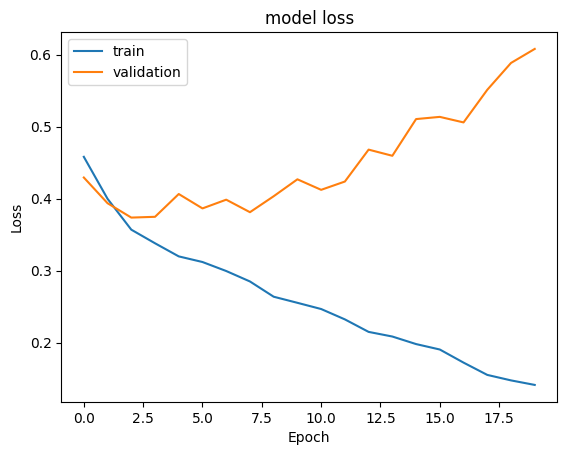

In [270]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

63/63 [==============================] - 0s 2ms/step
Best Threshold=0.035808, G-Mean=0.718


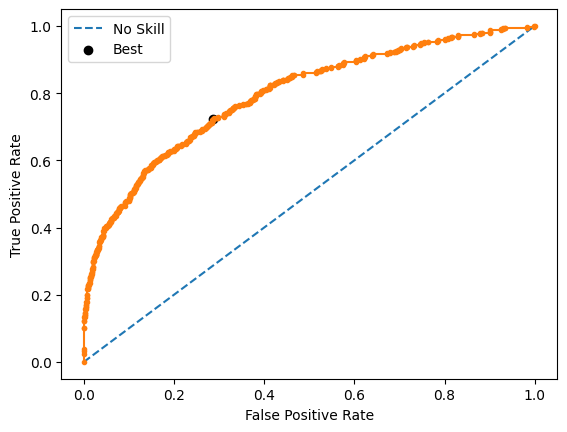

In [271]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat7 = model7.predict(X_test)
# keep probabilities for the positive outcome only
yhat7 = yhat7[:, 0]
# calculate roc curves
fpr, tpr, thresholds7 = roc_curve(y_test, yhat7)
# calculate the g-mean for each threshold
gmeans7 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans7)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds7[ix], gmeans7[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [272]:
y_pred_e7=model7.predict(X_test)
y_pred_e7 = (y_pred_e7 > thresholds7[ix])
y_pred_e7

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

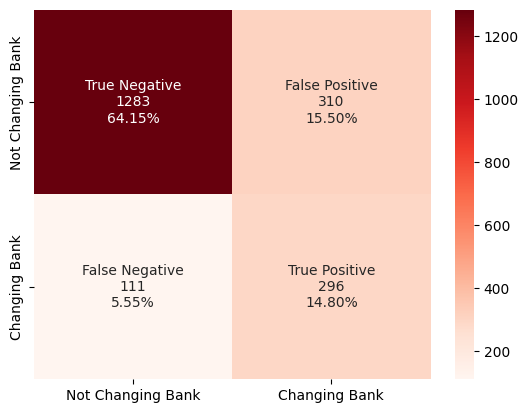

In [273]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm7=confusion_matrix(y_test, y_pred_e4)
#labels = ['True Positive','False Negative','False Positive','True Negative']
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Changing Bank','Changing Bank']
make_confusion_matrix(cm7,
                      group_names=labels,
                      categories=categories,
                      cmap='Reds')

In [274]:
#Accuracy as per the classification report
from sklearn import metrics
cr7=metrics.classification_report(y_test,y_pred_e7)
print(cr7)

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1593
           1       0.39      0.72      0.51       407

    accuracy                           0.71      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.80      0.71      0.74      2000



Model RECALL not improved compared the best result of 0.80.

###BEST MODEL PARAMETERS

Best Model is shown as MODEL 4 with DROPOUT TECHNIQUE

Parameters:

Dropout Rate:0.2

Neuron Sequence 128,64,32

Activation Function RELU and Optimizer ADAM

50 EPOCHS , 64 Batch Size

ROC-AOC Best Threshold 0.1347

RECALL:0.80

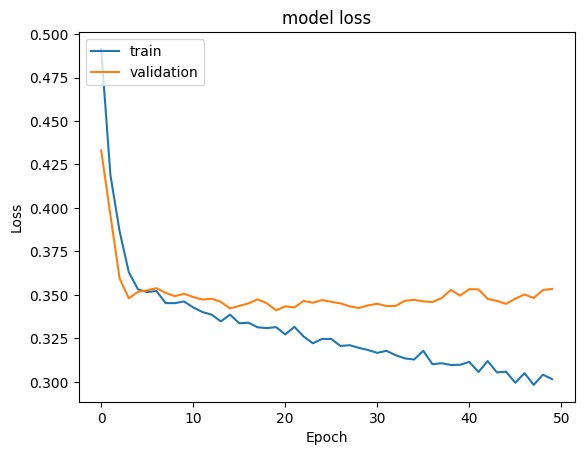

In [275]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

63/63 [==============================] - 0s 1ms/step
Best Threshold=0.134758, G-Mean=0.773


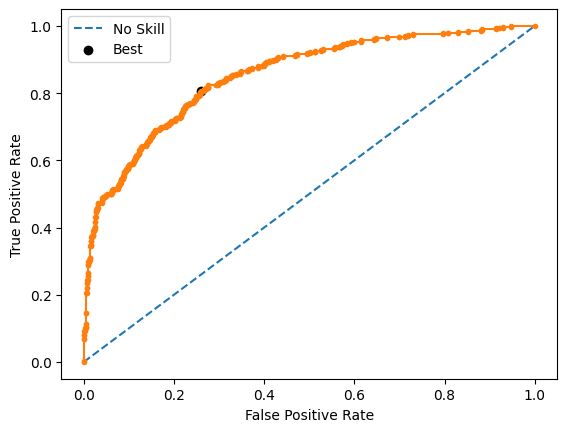

In [276]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat3 = model3.predict(X_test)
# keep probabilities for the positive outcome only
yhat3 = yhat3[:, 0]
# calculate roc curves
fpr, tpr, thresholds3 = roc_curve(y_test, yhat3)
# calculate the g-mean for each threshold
gmeans3 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans3)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds3[ix], gmeans3[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

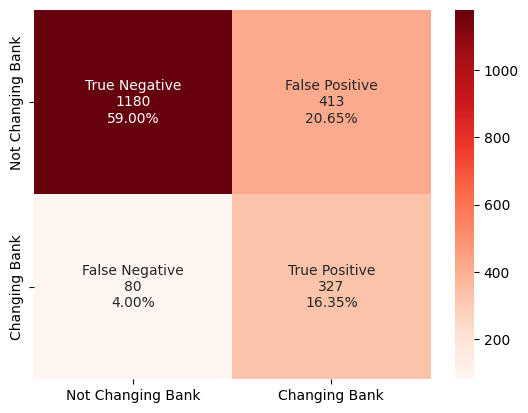

In [277]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm3=confusion_matrix(y_test, y_pred_e3)
#labels = ['True Positive','False Negative','False Positive','True Negative']
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Changing Bank','Changing Bank']
make_confusion_matrix(cm3,
                      group_names=labels,
                      categories=categories,
                      cmap='Reds')

In [278]:
#Accuracy as per the classification report
from sklearn import metrics
cr3=metrics.classification_report(y_test,y_pred_e3)
print(cr3)

              precision    recall  f1-score   support

           0       0.94      0.74      0.83      1593
           1       0.44      0.80      0.57       407

    accuracy                           0.75      2000
   macro avg       0.69      0.77      0.70      2000
weighted avg       0.84      0.75      0.77      2000



`RECALL` increased to 0.80 with optimzied threshold value. Old model score was 0.75 so we improved our model with using DROPOUT Method

`F1` Score is the highest score which shows %57

###KEY TAKEAWAY FOR THE BUSINESS


1-Exited has a POSITIVE Correlation with Age , older people thinks to leave more tha younger people.

**Bank can produce some campaigns for older people class.**

2-Exited has a POSITIVE Correlation with Balance, this means that customers having increased balance exited more.

**While customer balance increases different type of products can be offered to customers to increase their loyalty to bank.**

3-Exited has a NEGATIVE Correlation with IsActiveMember,this means that customers who uses bank product more regulary has some loyalty to bank.

**Increasing product number and utilization will impact positively to stay in bank**

4-Exited has a NEGATIVE Correlation with Tenure,this means that customer enggament year negatively impacating Exited ratio

**Bank can offer awards based on Tenur to its customers , so this may icrease satisfaction and decrease leaves from bank**

5-Credit Score has a POSITIVE Correlation with IsActiveMember,this means that customers who has good score are generally stable customers.

**Bank can be more sure of these type of customers' loyalty than others.**












